In [1]:
# Import libraries and modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import ast
import sys
import importlib
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskElasticNet
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, KFold
import pickle

In [3]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [5]:
# Append the project root directory to sys.path
sys.path.append(os.path.join(os.getcwd(), '..'))

from config import config

# import the root directory path
project_path = config.ROOT_DIR
print("Project Path:", project_path)

Project Path: C:\Users\chame\OneDrive\Desktop\Test_Env_Data_Analysis\For_Porfolio\House Prices - Advanced Regression\house-prices-advanced-regression-techniques


#### Import functions

In [6]:
sys.path.append(project_path+"/scripts/data_prep/")

In [7]:
print(sys.path)

['C:\\Users\\chame\\OneDrive\\Desktop\\Test_Env_Data_Analysis\\For_Porfolio\\House Prices - Advanced Regression\\house-prices-advanced-regression-techniques\\notebooks', '', 'C:\\Users\\chame\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages', 'C:\\Users\\chame\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'C:\\Users\\chame\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'C:\\Users\\chame\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'C:\\Users\\chame\\AppData\\Local\\Programs\\Python\\Python311', 'C:\\Users\\chame\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32', 'C:\\Users\\chame\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\chame\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\chame\\OneDrive\\Desktop\\Test_Env_Data_Analysis\\For_Porfolio\\House Prices - Advanced Regression\\house-prices-advanced-regression-techniques\\notebooks\\..

In [8]:
import prep
import transformation
import file_mngt
importlib.reload(prep)
importlib.reload(transformation)
importlib.reload(file_mngt)

<module 'file_mngt' from 'C:\\Users\\chame\\OneDrive\\Desktop\\Test_Env_Data_Analysis\\For_Porfolio\\House Prices - Advanced Regression\\house-prices-advanced-regression-techniques/scripts/data_prep\\file_mngt.py'>

In [9]:
from prep import fill_na, column_overview, determine_cardinality
from file_mngt import save_list_to_file
from transformation import plot_and_transform_skewness_all_cols, plot_and_transform_skewness_specific_cols
from transformation import plot_square_root_transformation, scale_numerical_features, one_hot_encode_dataframe, separate_variables_for_model_dev
from transformation import separate_variables_for_model_dev

### 1. Import Data

In [10]:
df_train = pd.read_csv(project_path+"/data/train.csv")

### 2. Understanding The Data

In [11]:
total_num_observations = df_train.shape[0]

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

Column: Id
Id contains 0 NA values

Id contains 1460 unique values

int64
Numerical Data


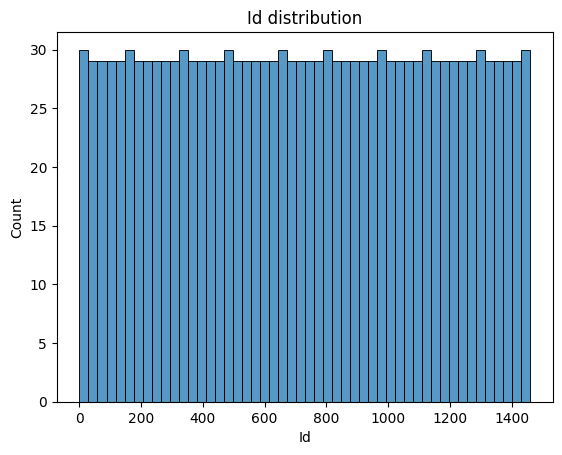

Column: MSSubClass
MSSubClass contains 0 NA values

MSSubClass contains 15 unique values

int64
Numerical Data


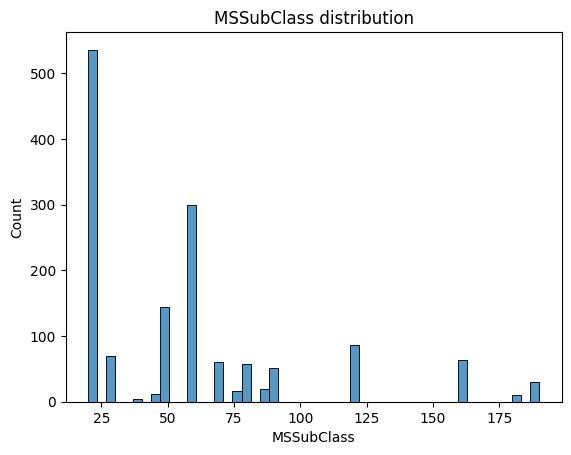

Column: MSZoning
MSZoning contains 0 NA values

MSZoning contains 5 unique values

object
Categorical Data


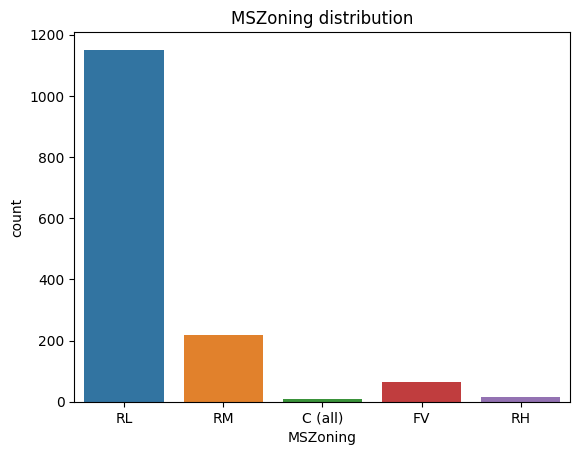

Column: LotFrontage
LotFrontage contains 259 NA values

LotFrontage contains 110 unique values

float64
Numerical Data


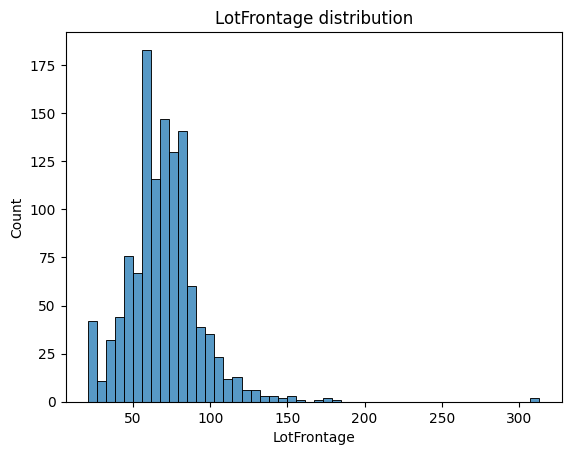

Column: LotArea
LotArea contains 0 NA values

LotArea contains 1073 unique values

int64
Numerical Data


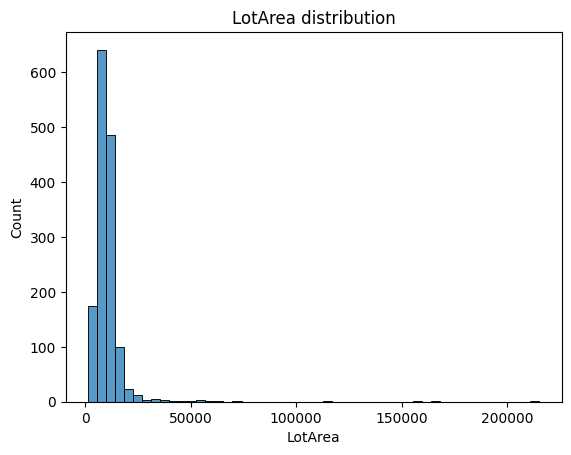

Column: Street
Street contains 0 NA values

Street contains 2 unique values

object
Categorical Data


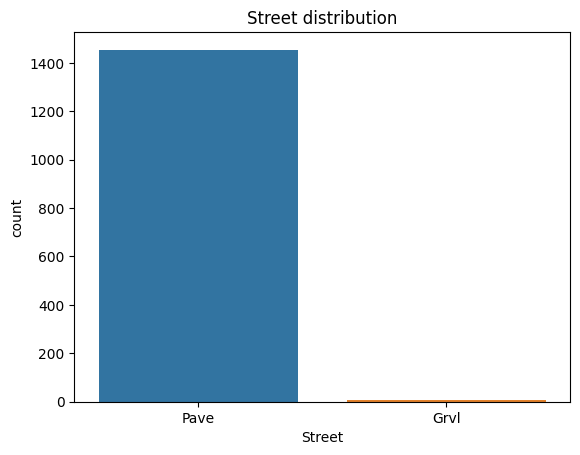

Column: Alley
Alley contains 1369 NA values

Alley contains 2 unique values

object
Categorical Data


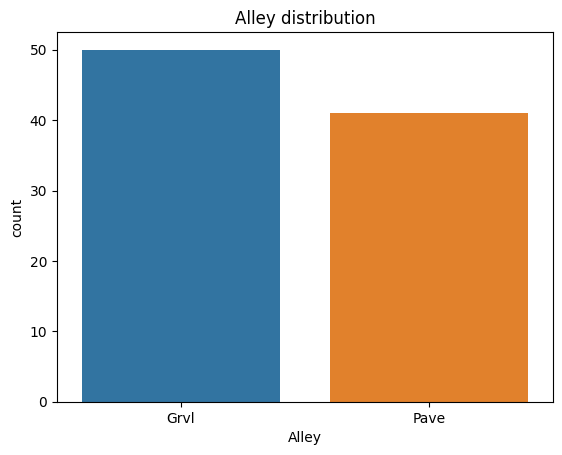

Column: LotShape
LotShape contains 0 NA values

LotShape contains 4 unique values

object
Categorical Data


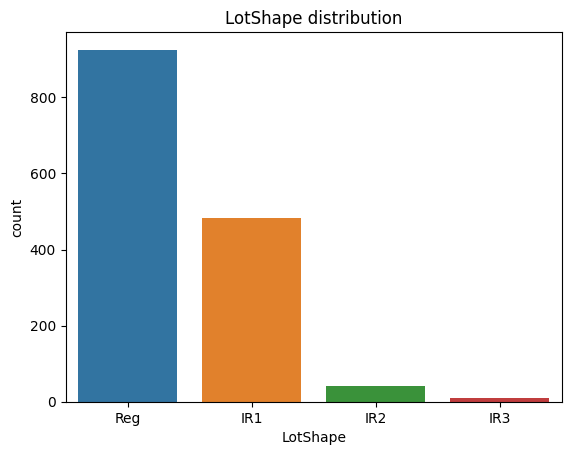

Column: LandContour
LandContour contains 0 NA values

LandContour contains 4 unique values

object
Categorical Data


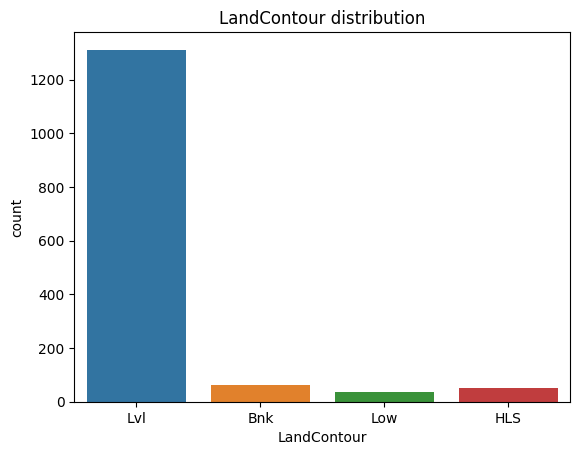

Column: Utilities
Utilities contains 0 NA values

Utilities contains 2 unique values

object
Categorical Data


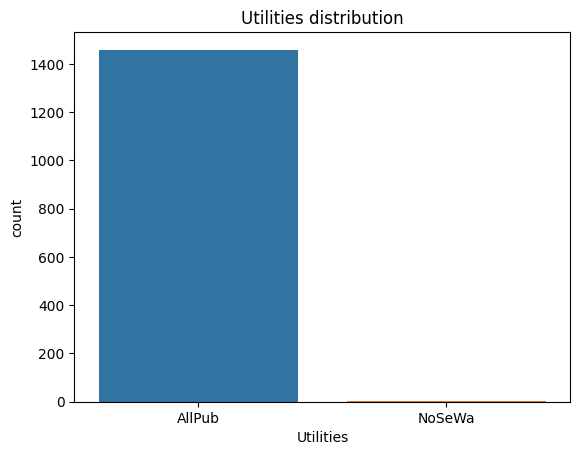

Column: LotConfig
LotConfig contains 0 NA values

LotConfig contains 5 unique values

object
Categorical Data


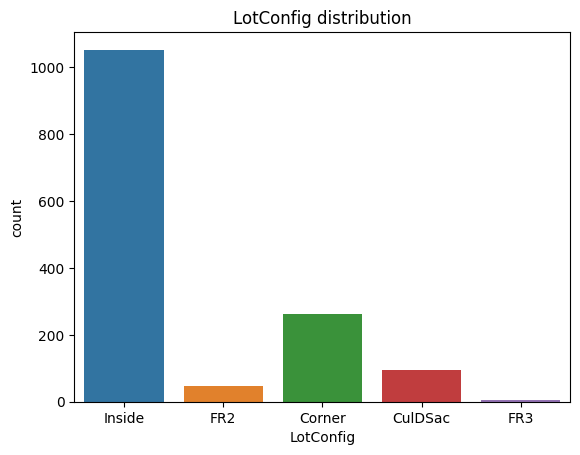

Column: LandSlope
LandSlope contains 0 NA values

LandSlope contains 3 unique values

object
Categorical Data


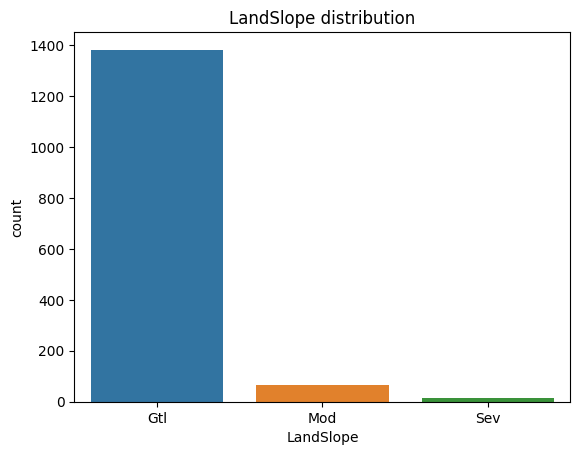

Column: Neighborhood
Neighborhood contains 0 NA values

Neighborhood contains 25 unique values

object
Categorical Data


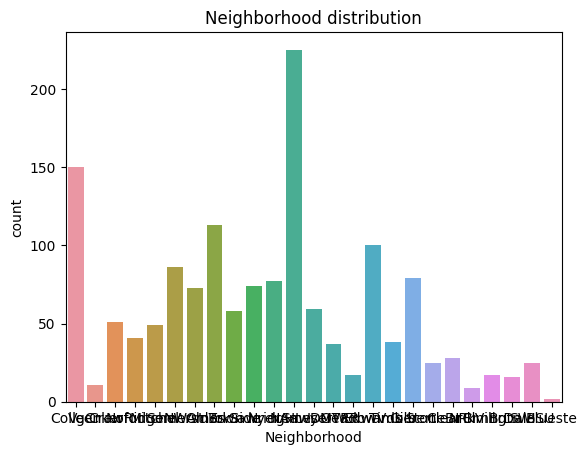

Column: Condition1
Condition1 contains 0 NA values

Condition1 contains 9 unique values

object
Categorical Data


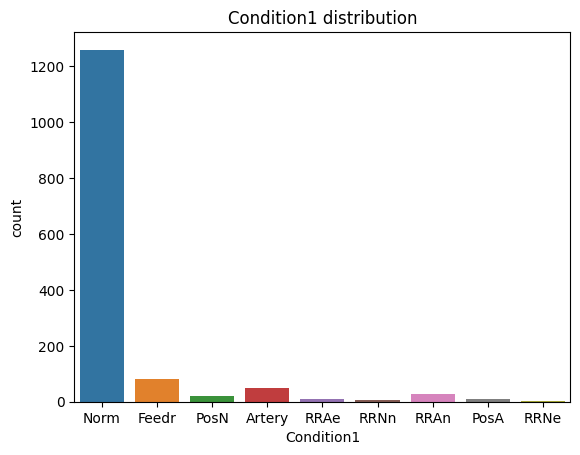

Column: Condition2
Condition2 contains 0 NA values

Condition2 contains 8 unique values

object
Categorical Data


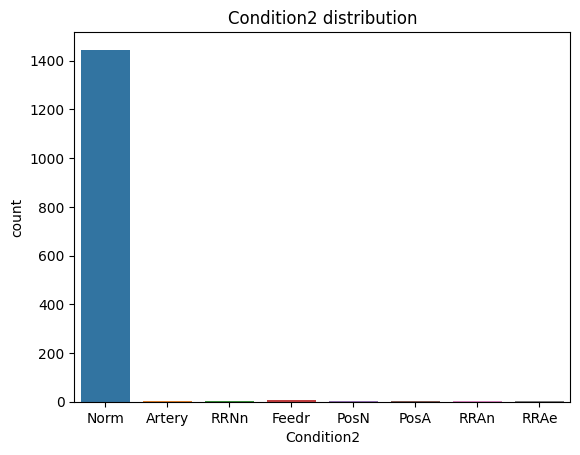

Column: BldgType
BldgType contains 0 NA values

BldgType contains 5 unique values

object
Categorical Data


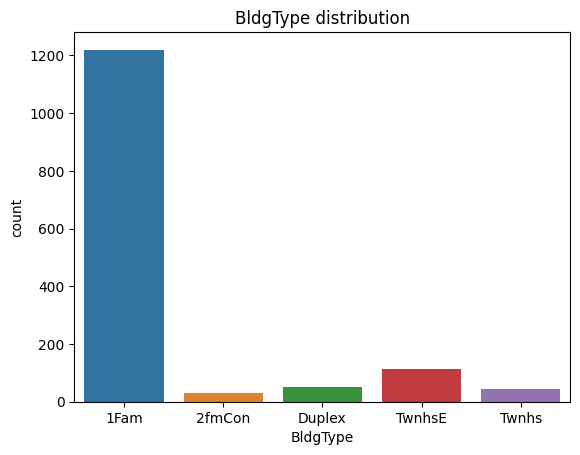

Column: HouseStyle
HouseStyle contains 0 NA values

HouseStyle contains 8 unique values

object
Categorical Data


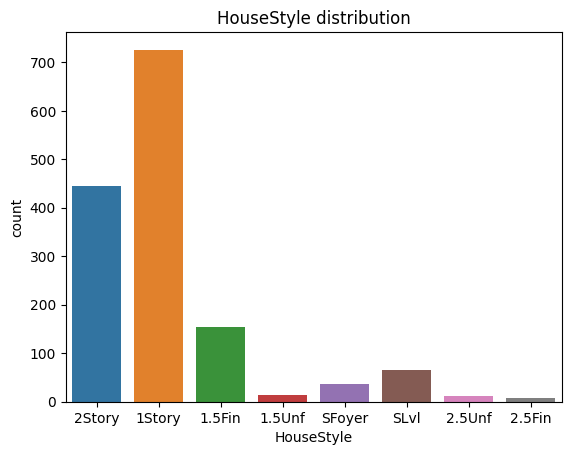

Column: OverallQual
OverallQual contains 0 NA values

OverallQual contains 10 unique values

int64
Numerical Data


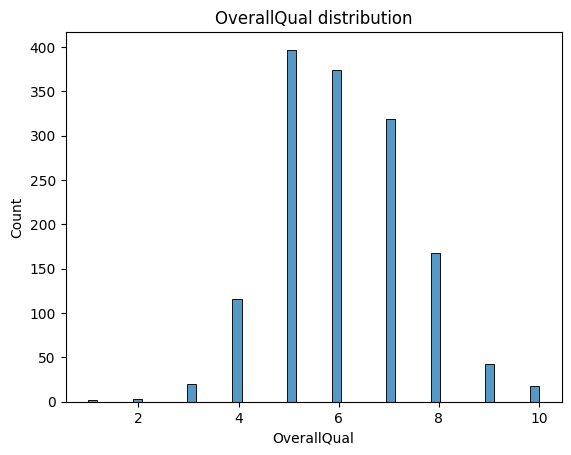

Column: OverallCond
OverallCond contains 0 NA values

OverallCond contains 9 unique values

int64
Numerical Data


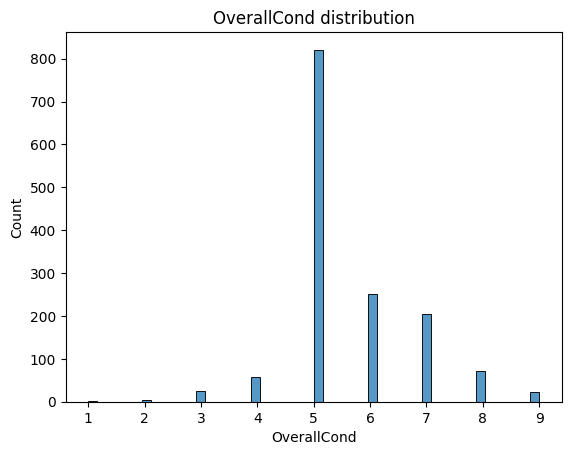

Column: YearBuilt
YearBuilt contains 0 NA values

YearBuilt contains 112 unique values

int64
Numerical Data


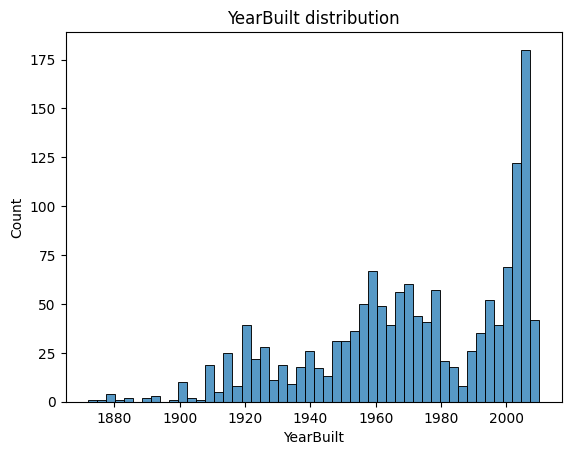

Column: YearRemodAdd
YearRemodAdd contains 0 NA values

YearRemodAdd contains 61 unique values

int64
Numerical Data


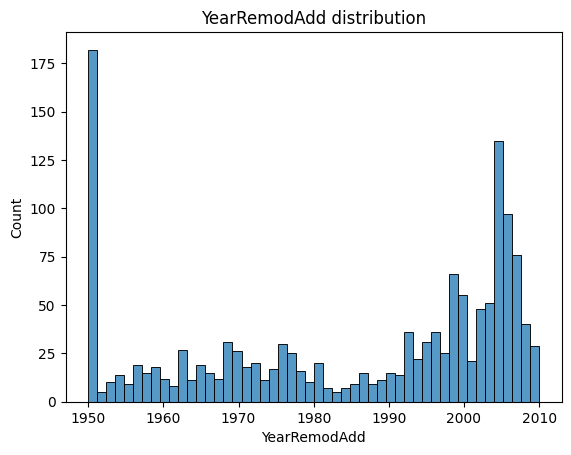

Column: RoofStyle
RoofStyle contains 0 NA values

RoofStyle contains 6 unique values

object
Categorical Data


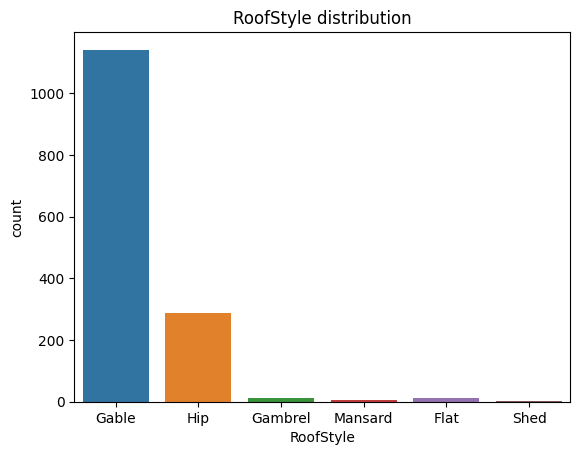

Column: RoofMatl
RoofMatl contains 0 NA values

RoofMatl contains 8 unique values

object
Categorical Data


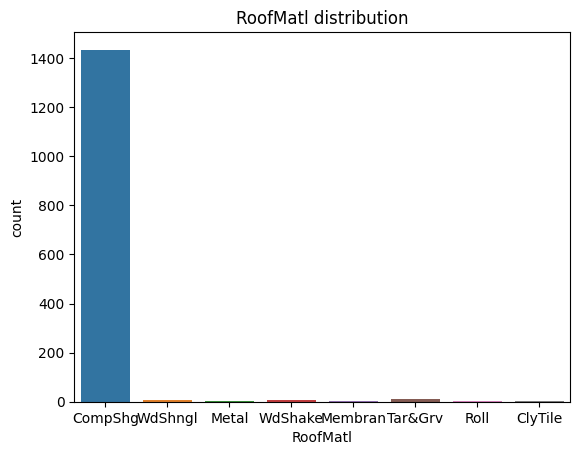

Column: Exterior1st
Exterior1st contains 0 NA values

Exterior1st contains 15 unique values

object
Categorical Data


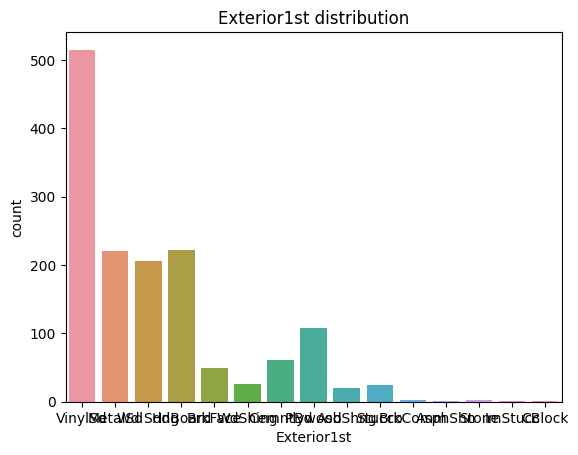

Column: Exterior2nd
Exterior2nd contains 0 NA values

Exterior2nd contains 16 unique values

object
Categorical Data


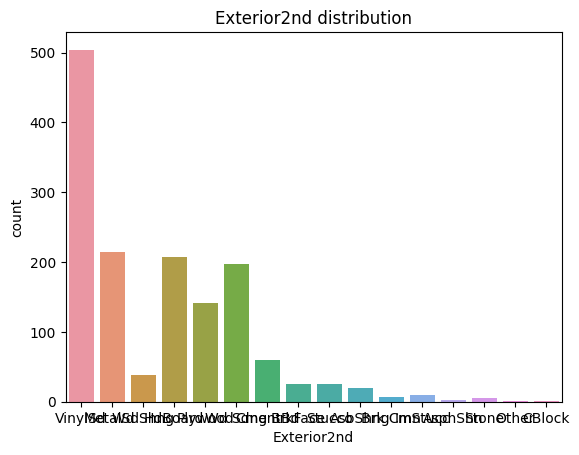

Column: MasVnrType
MasVnrType contains 872 NA values

MasVnrType contains 3 unique values

object
Categorical Data


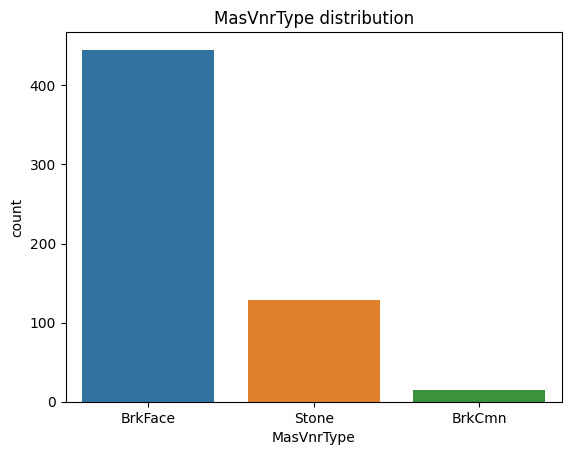

Column: MasVnrArea
MasVnrArea contains 8 NA values

MasVnrArea contains 327 unique values

float64
Numerical Data


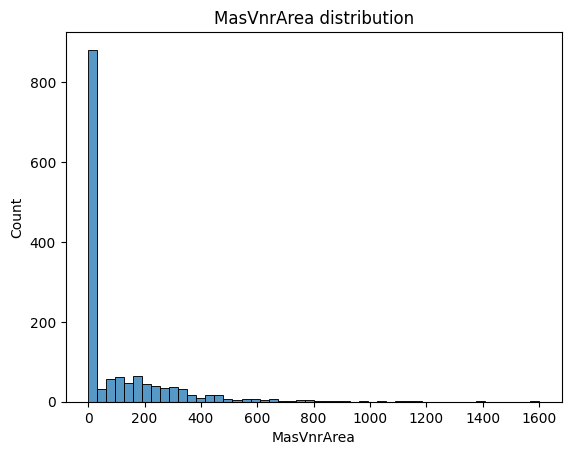

Column: ExterQual
ExterQual contains 0 NA values

ExterQual contains 4 unique values

object
Categorical Data


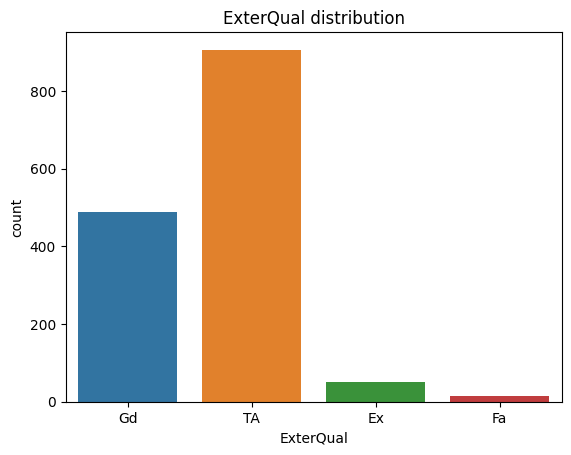

Column: ExterCond
ExterCond contains 0 NA values

ExterCond contains 5 unique values

object
Categorical Data


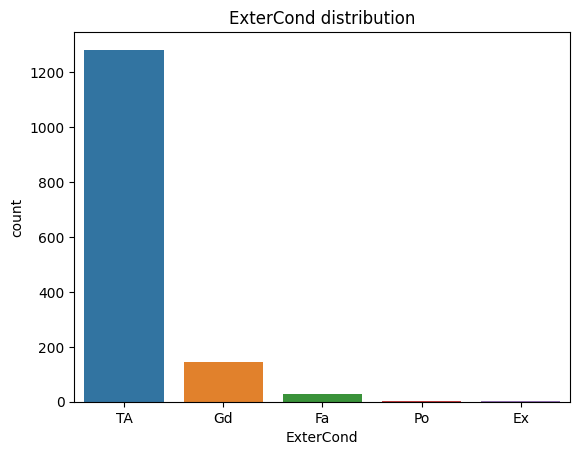

Column: Foundation
Foundation contains 0 NA values

Foundation contains 6 unique values

object
Categorical Data


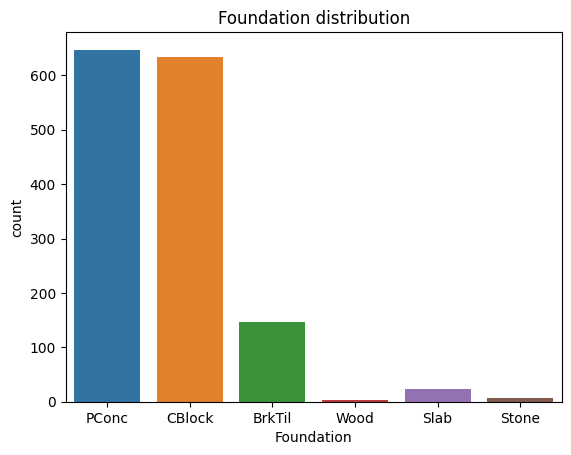

Column: BsmtQual
BsmtQual contains 37 NA values

BsmtQual contains 4 unique values

object
Categorical Data


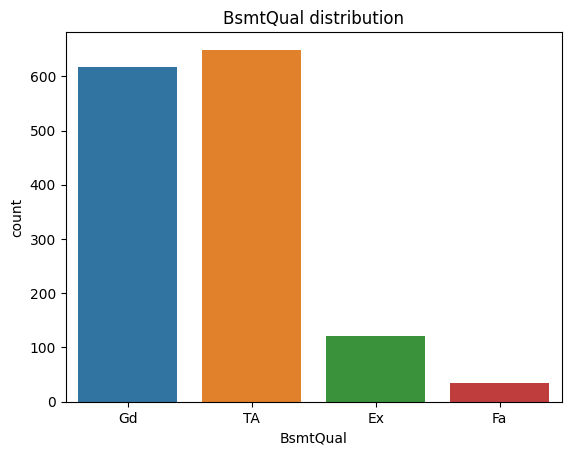

Column: BsmtCond
BsmtCond contains 37 NA values

BsmtCond contains 4 unique values

object
Categorical Data


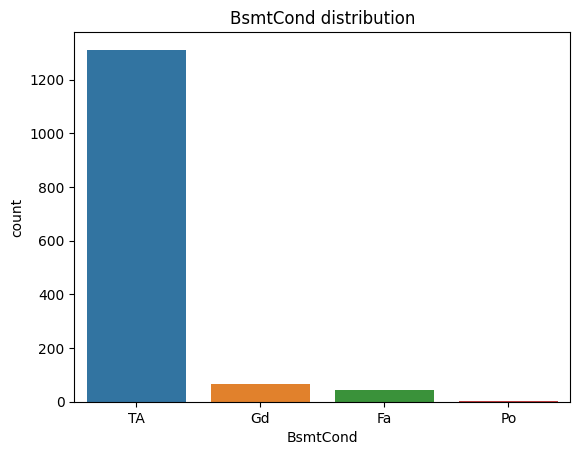

Column: BsmtExposure
BsmtExposure contains 38 NA values

BsmtExposure contains 4 unique values

object
Categorical Data


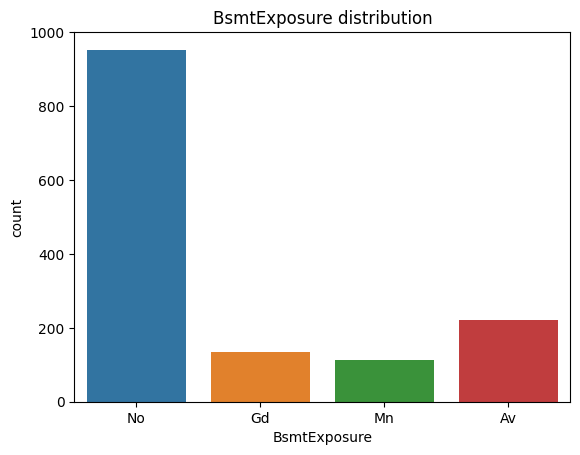

Column: BsmtFinType1
BsmtFinType1 contains 37 NA values

BsmtFinType1 contains 6 unique values

object
Categorical Data


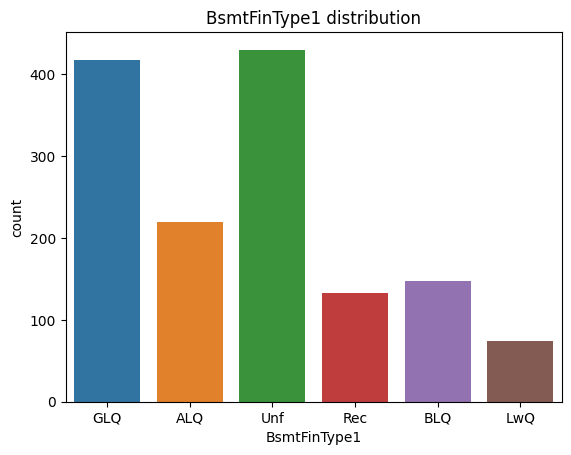

Column: BsmtFinSF1
BsmtFinSF1 contains 0 NA values

BsmtFinSF1 contains 637 unique values

int64
Numerical Data


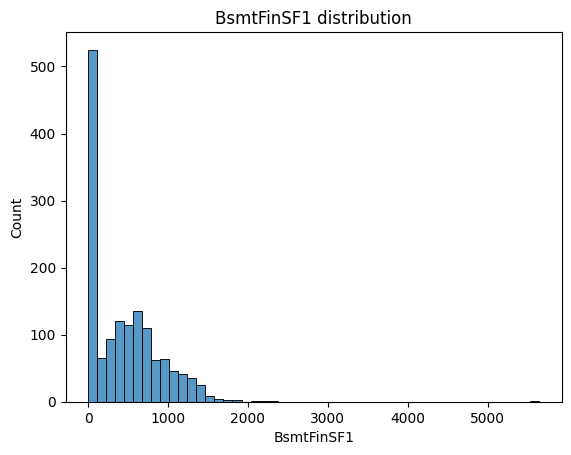

Column: BsmtFinType2
BsmtFinType2 contains 38 NA values

BsmtFinType2 contains 6 unique values

object
Categorical Data


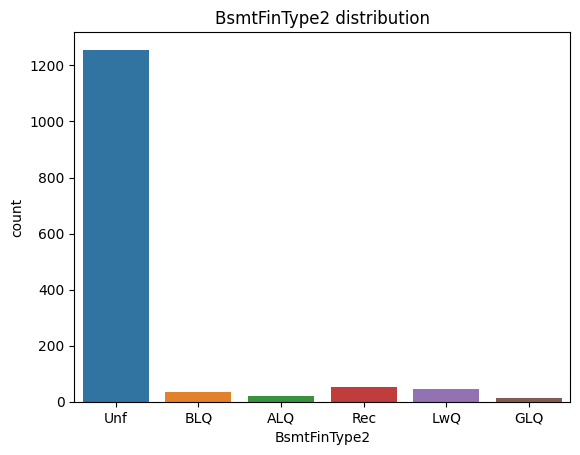

Column: BsmtFinSF2
BsmtFinSF2 contains 0 NA values

BsmtFinSF2 contains 144 unique values

int64
Numerical Data


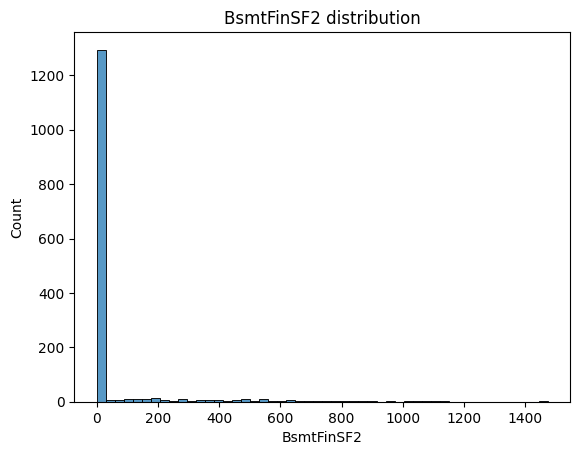

Column: BsmtUnfSF
BsmtUnfSF contains 0 NA values

BsmtUnfSF contains 780 unique values

int64
Numerical Data


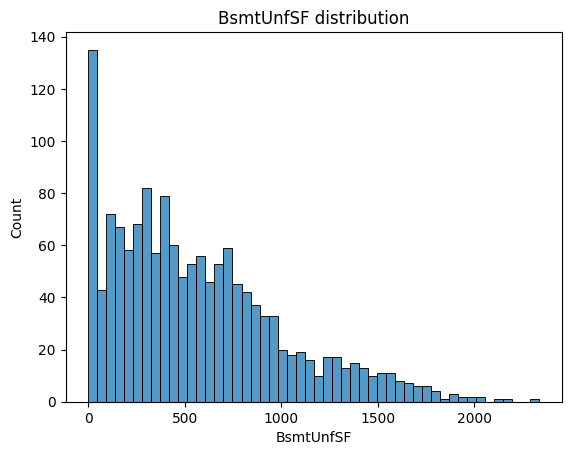

Column: TotalBsmtSF
TotalBsmtSF contains 0 NA values

TotalBsmtSF contains 721 unique values

int64
Numerical Data


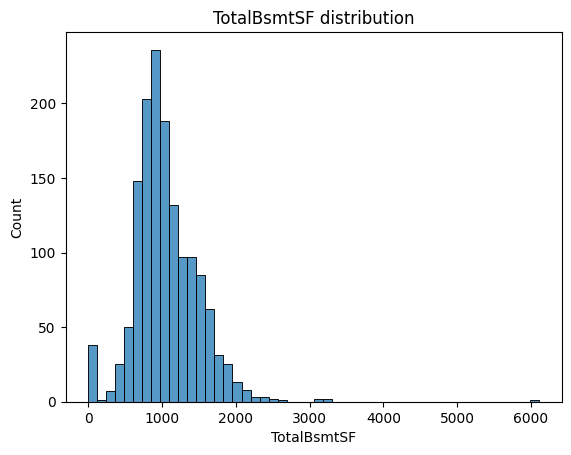

Column: Heating
Heating contains 0 NA values

Heating contains 6 unique values

object
Categorical Data


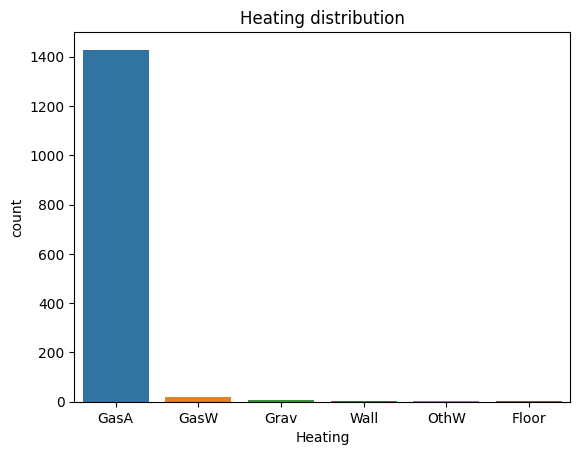

Column: HeatingQC
HeatingQC contains 0 NA values

HeatingQC contains 5 unique values

object
Categorical Data


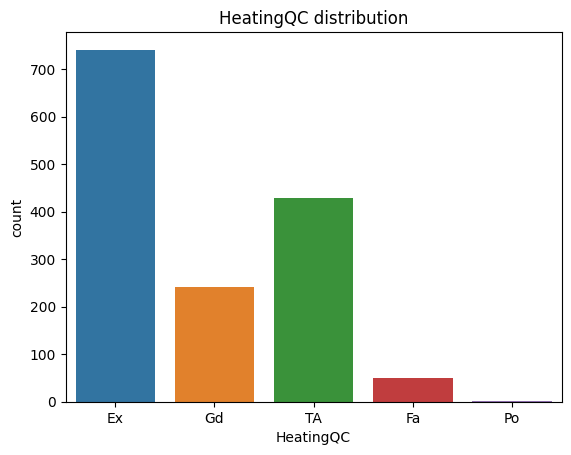

Column: CentralAir
CentralAir contains 0 NA values

CentralAir contains 2 unique values

object
Categorical Data


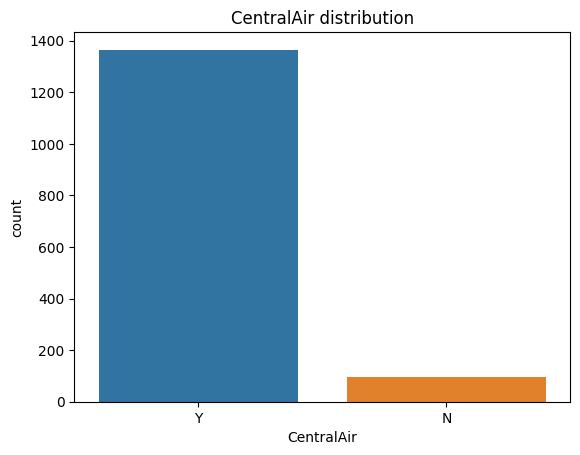

Column: Electrical
Electrical contains 1 NA values

Electrical contains 5 unique values

object
Categorical Data


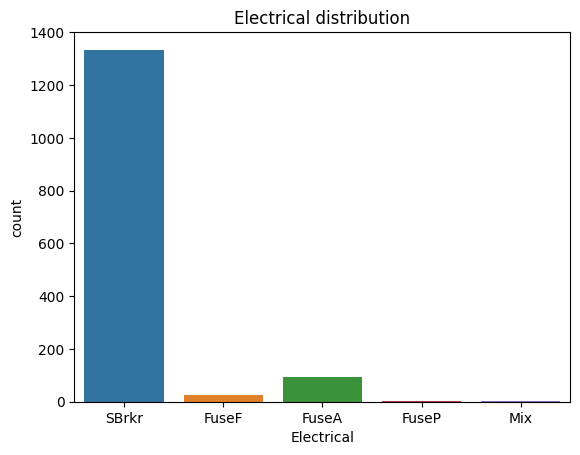

Column: 1stFlrSF
1stFlrSF contains 0 NA values

1stFlrSF contains 753 unique values

int64
Numerical Data


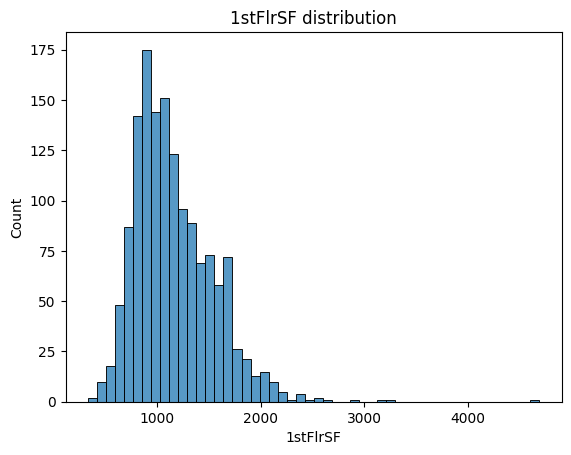

Column: 2ndFlrSF
2ndFlrSF contains 0 NA values

2ndFlrSF contains 417 unique values

int64
Numerical Data


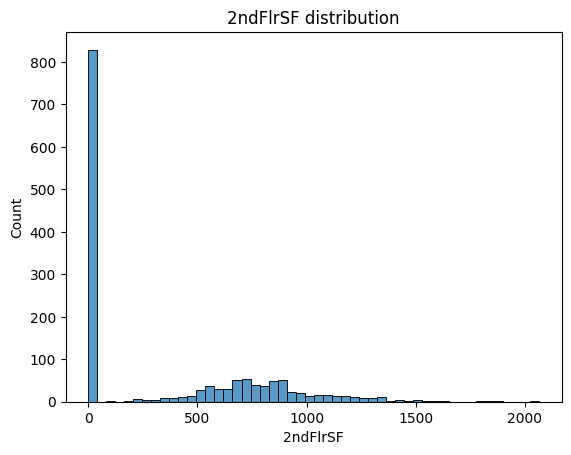

Column: LowQualFinSF
LowQualFinSF contains 0 NA values

LowQualFinSF contains 24 unique values

int64
Numerical Data


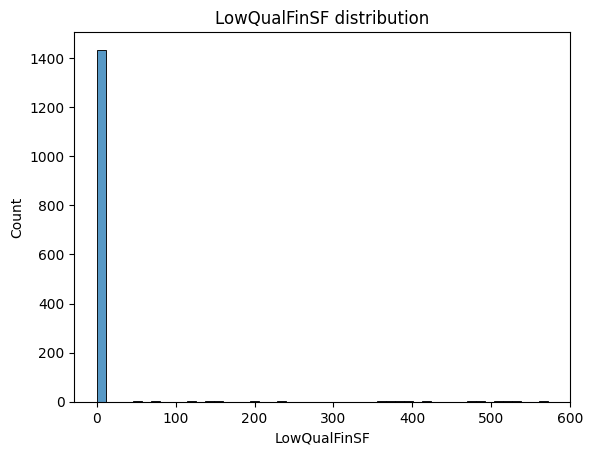

Column: GrLivArea
GrLivArea contains 0 NA values

GrLivArea contains 861 unique values

int64
Numerical Data


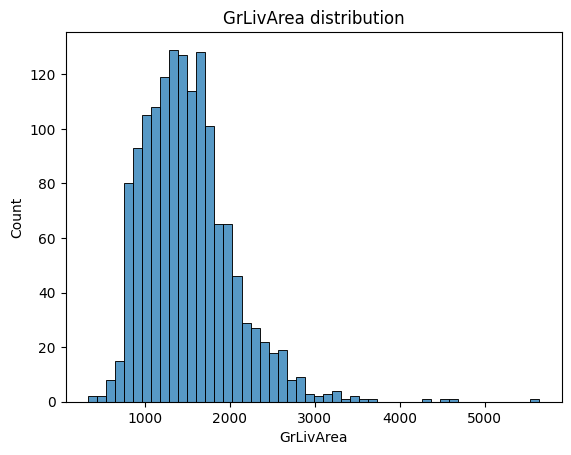

Column: BsmtFullBath
BsmtFullBath contains 0 NA values

BsmtFullBath contains 4 unique values

int64
Numerical Data


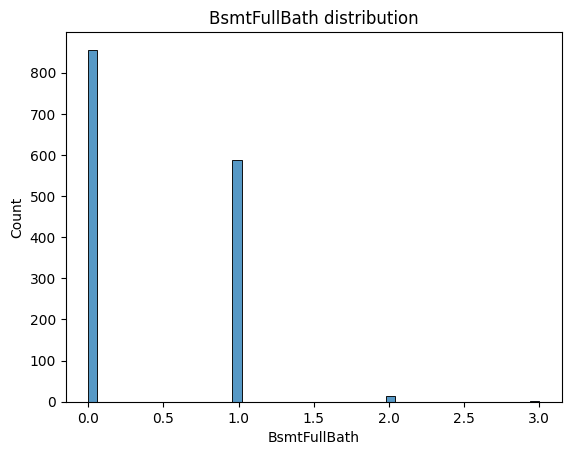

Column: BsmtHalfBath
BsmtHalfBath contains 0 NA values

BsmtHalfBath contains 3 unique values

int64
Numerical Data


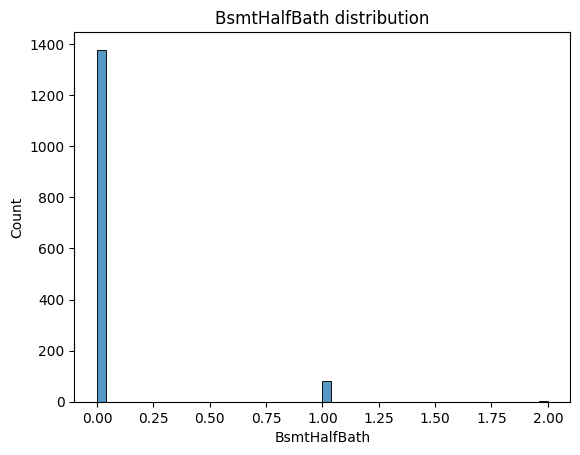

Column: FullBath
FullBath contains 0 NA values

FullBath contains 4 unique values

int64
Numerical Data


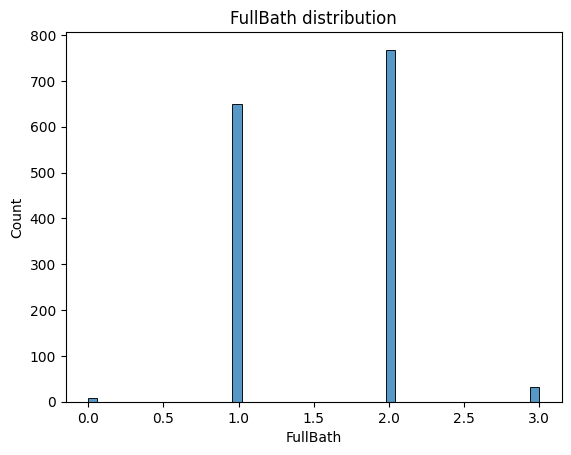

Column: HalfBath
HalfBath contains 0 NA values

HalfBath contains 3 unique values

int64
Numerical Data


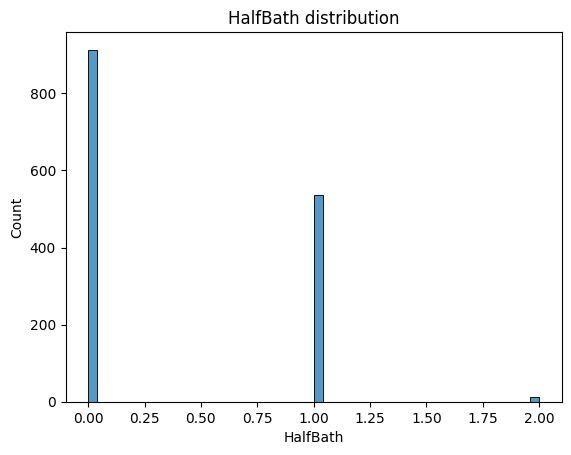

Column: BedroomAbvGr
BedroomAbvGr contains 0 NA values

BedroomAbvGr contains 8 unique values

int64
Numerical Data


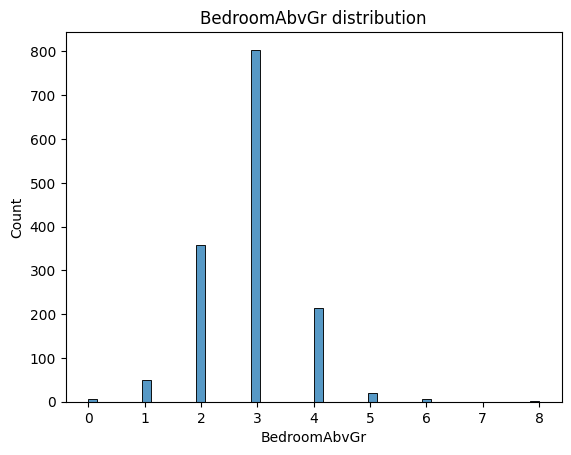

Column: KitchenAbvGr
KitchenAbvGr contains 0 NA values

KitchenAbvGr contains 4 unique values

int64
Numerical Data


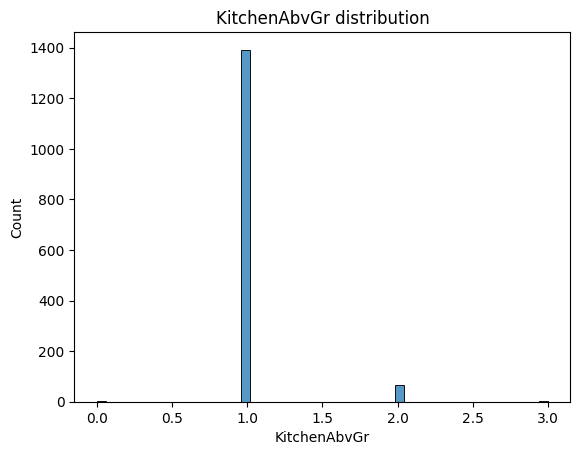

Column: KitchenQual
KitchenQual contains 0 NA values

KitchenQual contains 4 unique values

object
Categorical Data


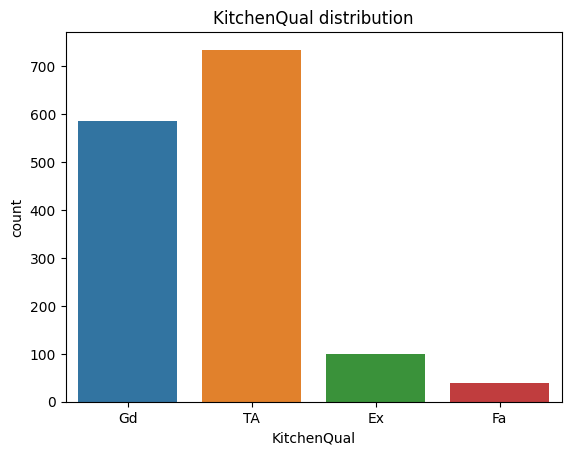

Column: TotRmsAbvGrd
TotRmsAbvGrd contains 0 NA values

TotRmsAbvGrd contains 12 unique values

int64
Numerical Data


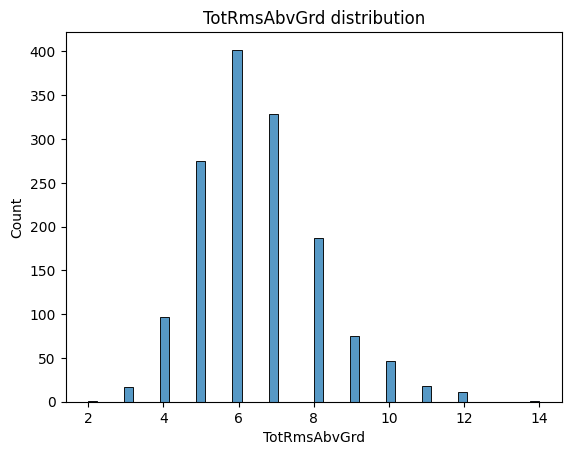

Column: Functional
Functional contains 0 NA values

Functional contains 7 unique values

object
Categorical Data


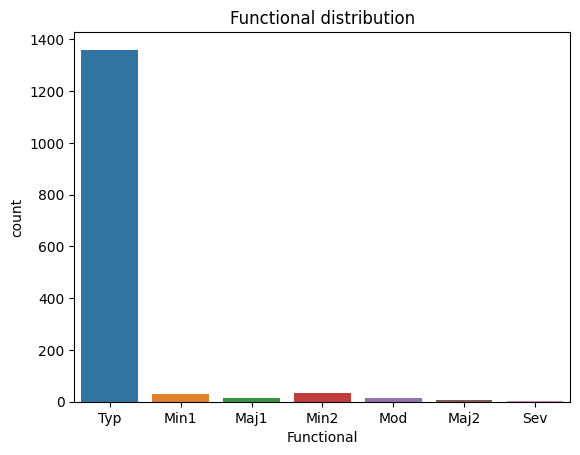

Column: Fireplaces
Fireplaces contains 0 NA values

Fireplaces contains 4 unique values

int64
Numerical Data


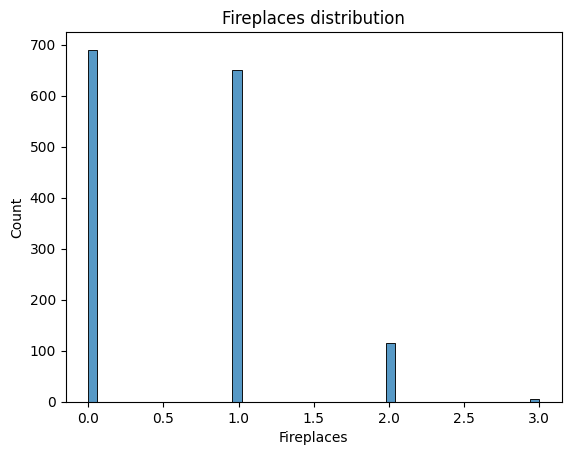

Column: FireplaceQu
FireplaceQu contains 690 NA values

FireplaceQu contains 5 unique values

object
Categorical Data


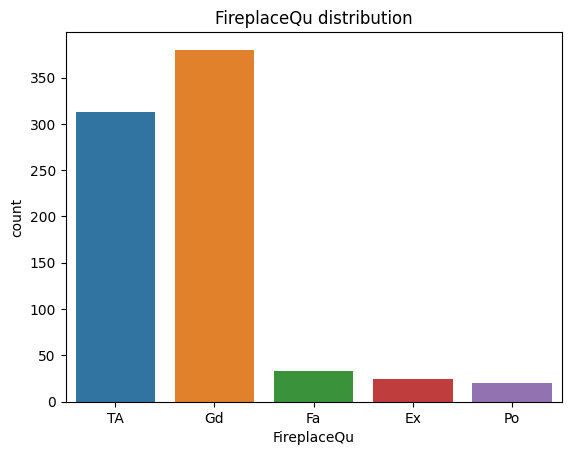

Column: GarageType
GarageType contains 81 NA values

GarageType contains 6 unique values

object
Categorical Data


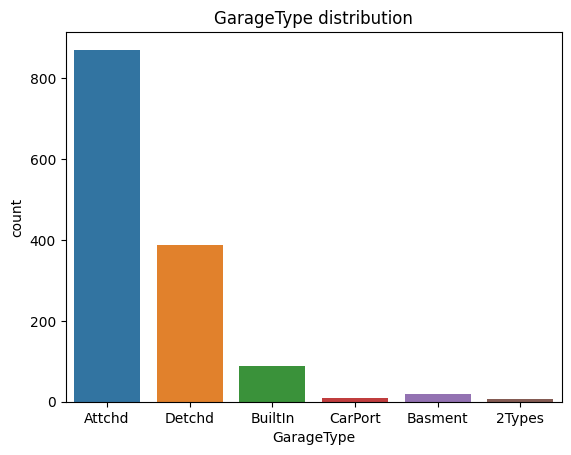

Column: GarageYrBlt
GarageYrBlt contains 81 NA values

GarageYrBlt contains 97 unique values

float64
Numerical Data


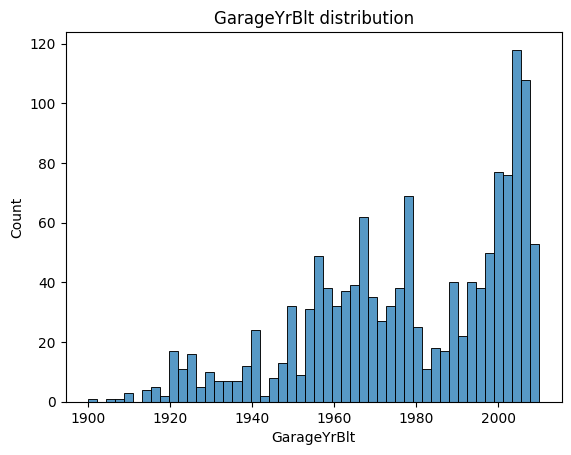

Column: GarageFinish
GarageFinish contains 81 NA values

GarageFinish contains 3 unique values

object
Categorical Data


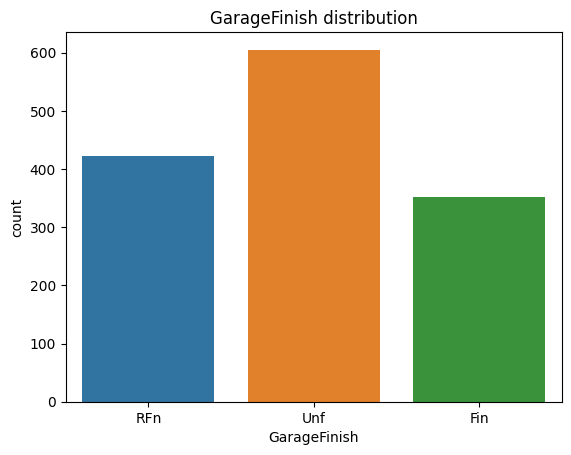

Column: GarageCars
GarageCars contains 0 NA values

GarageCars contains 5 unique values

int64
Numerical Data


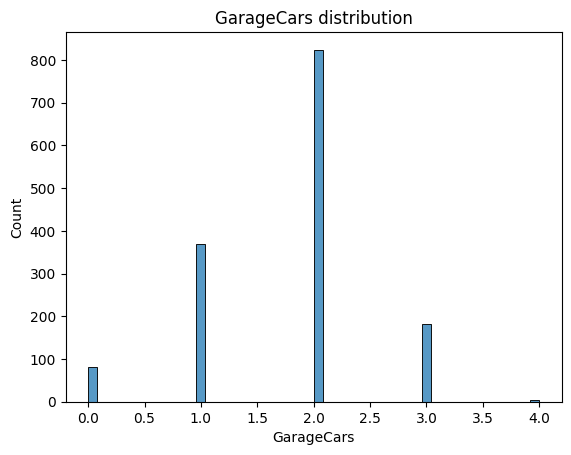

Column: GarageArea
GarageArea contains 0 NA values

GarageArea contains 441 unique values

int64
Numerical Data


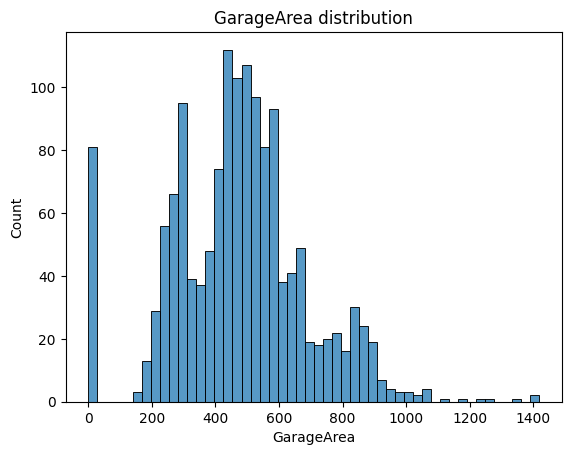

Column: GarageQual
GarageQual contains 81 NA values

GarageQual contains 5 unique values

object
Categorical Data


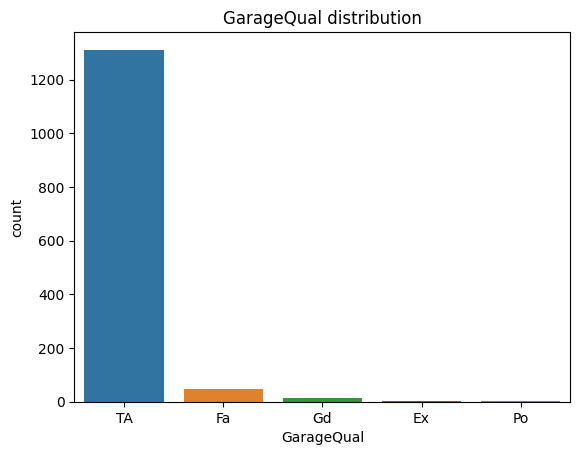

Column: GarageCond
GarageCond contains 81 NA values

GarageCond contains 5 unique values

object
Categorical Data


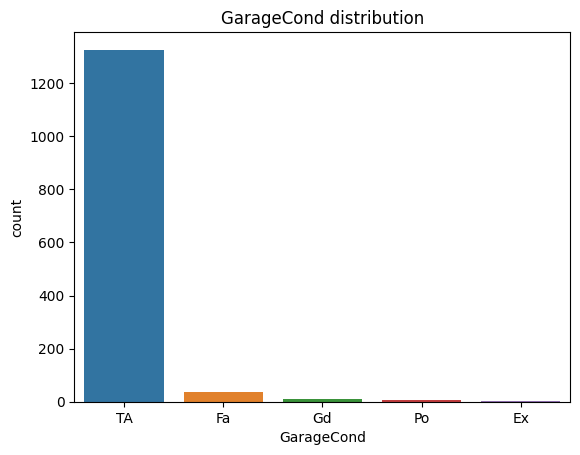

Column: PavedDrive
PavedDrive contains 0 NA values

PavedDrive contains 3 unique values

object
Categorical Data


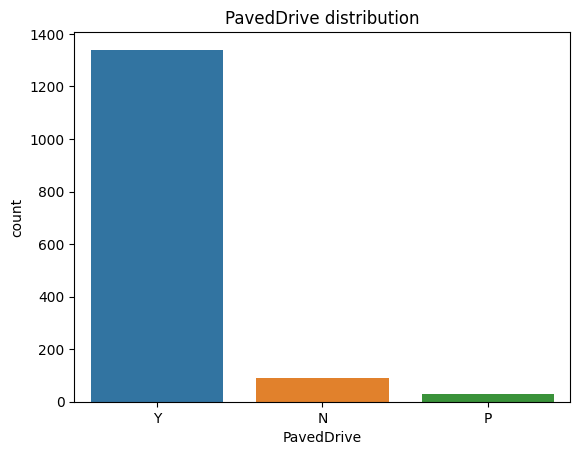

Column: WoodDeckSF
WoodDeckSF contains 0 NA values

WoodDeckSF contains 274 unique values

int64
Numerical Data


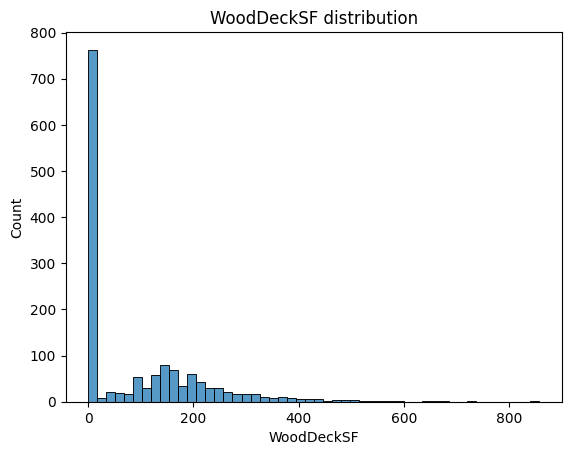

Column: OpenPorchSF
OpenPorchSF contains 0 NA values

OpenPorchSF contains 202 unique values

int64
Numerical Data


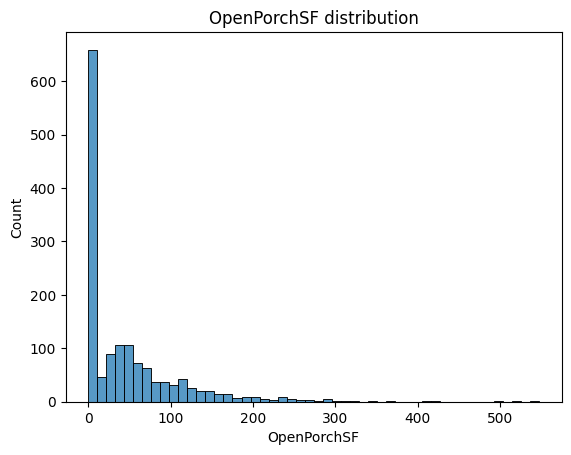

Column: EnclosedPorch
EnclosedPorch contains 0 NA values

EnclosedPorch contains 120 unique values

int64
Numerical Data


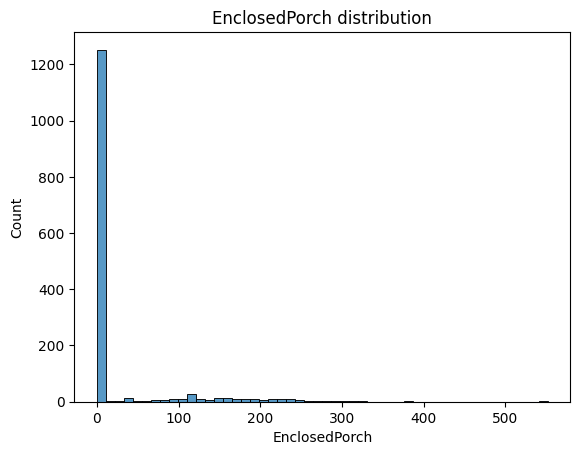

Column: 3SsnPorch
3SsnPorch contains 0 NA values

3SsnPorch contains 20 unique values

int64
Numerical Data


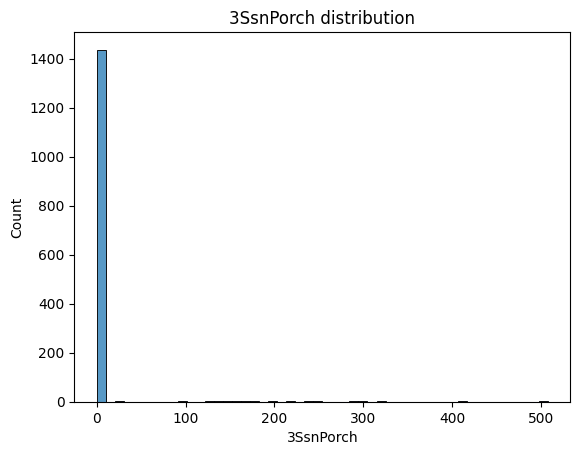

Column: ScreenPorch
ScreenPorch contains 0 NA values

ScreenPorch contains 76 unique values

int64
Numerical Data


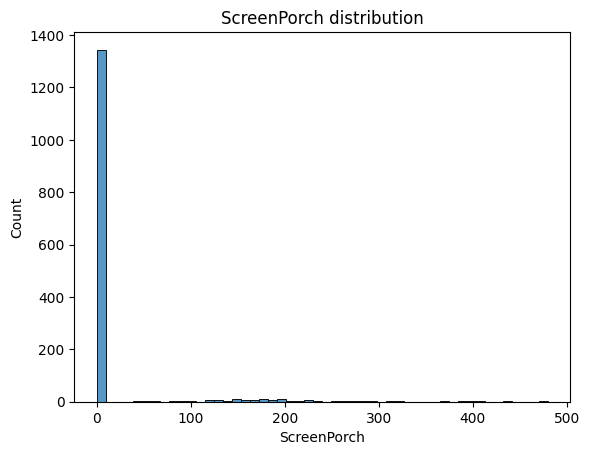

Column: PoolArea
PoolArea contains 0 NA values

PoolArea contains 8 unique values

int64
Numerical Data


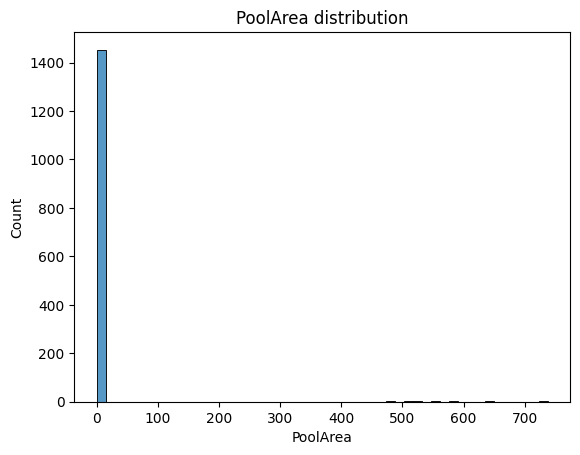

Column: PoolQC
PoolQC contains 1453 NA values

PoolQC contains 3 unique values

object
Categorical Data


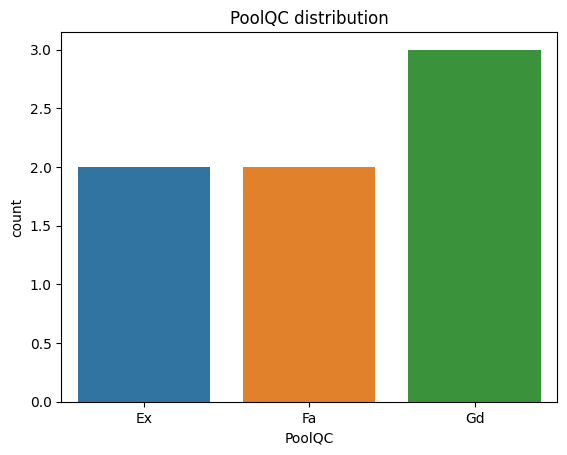

Column: Fence
Fence contains 1179 NA values

Fence contains 4 unique values

object
Categorical Data


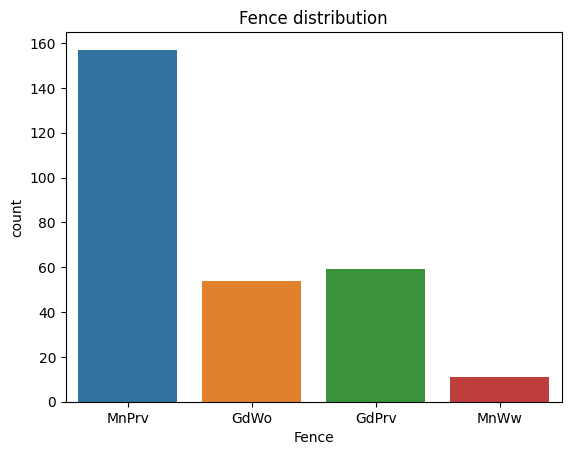

Column: MiscFeature
MiscFeature contains 1406 NA values

MiscFeature contains 4 unique values

object
Categorical Data


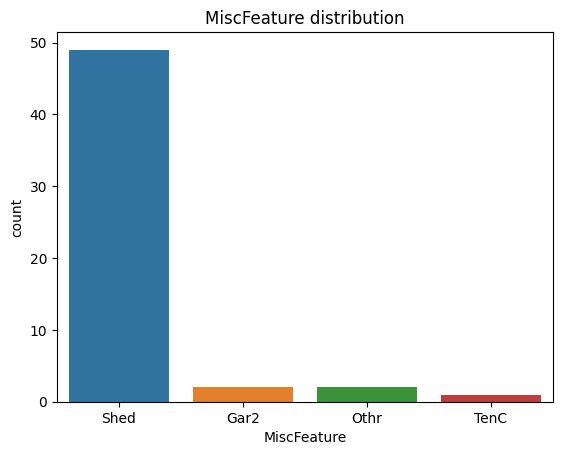

Column: MiscVal
MiscVal contains 0 NA values

MiscVal contains 21 unique values

int64
Numerical Data


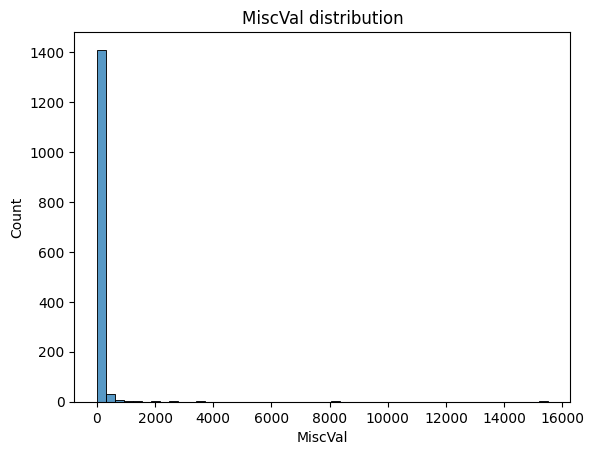

Column: MoSold
MoSold contains 0 NA values

MoSold contains 12 unique values

int64
Numerical Data


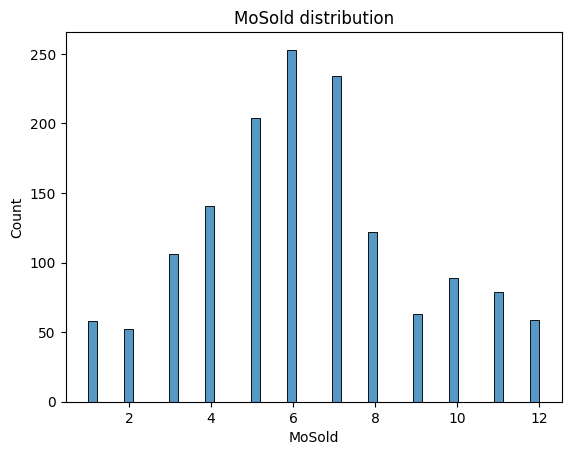

Column: YrSold
YrSold contains 0 NA values

YrSold contains 5 unique values

int64
Numerical Data


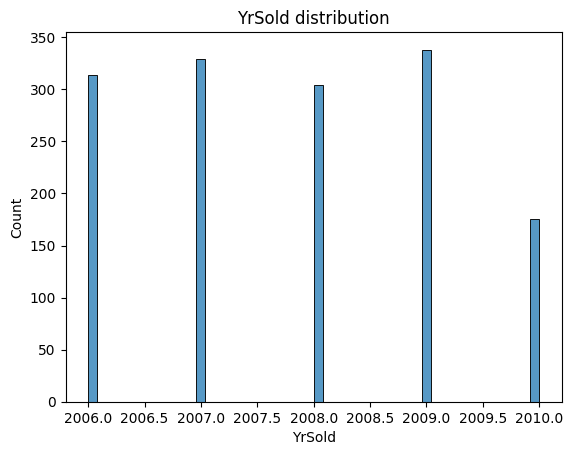

Column: SaleType
SaleType contains 0 NA values

SaleType contains 9 unique values

object
Categorical Data


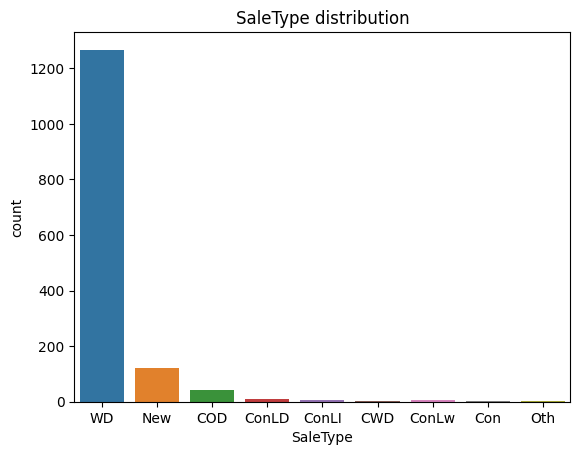

Column: SaleCondition
SaleCondition contains 0 NA values

SaleCondition contains 6 unique values

object
Categorical Data


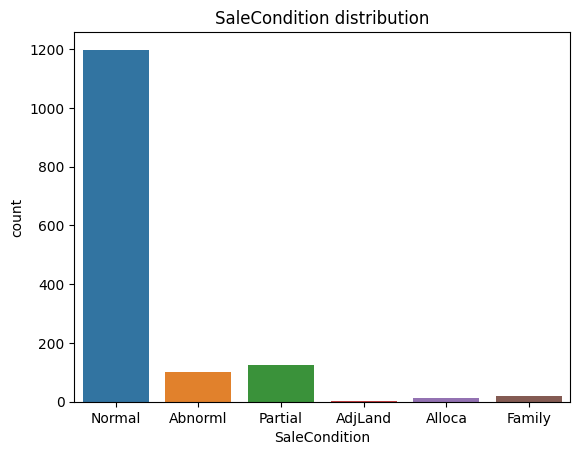

Column: SalePrice
SalePrice contains 0 NA values

SalePrice contains 663 unique values

int64
Numerical Data


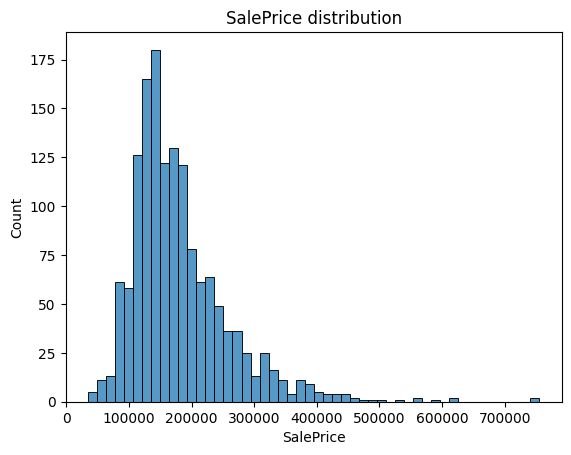

In [14]:
# Review feature statistics and distribution
for i in df_train.columns:
    print(f"Column: {i}")
    column_overview(df_train, i, 50)

### Insights:
- Several features exhibit a high count of null values, indicating potential gaps in the dataset
- Certain features demonstrate high cardinality, indicating a wide variety of unique values
- The distribution of 'SalePrice' (and a number of other features) are right-skewed, indicating a concentration of values below the mean

### 3. Prep Data For Model Dev

#### 3.1 Data Cleaning

##### Managing null values features

In [15]:
# Generate a dataframe that identifies features with high null values
null_list=[]
for col in list(df_train.columns):
    num_null = df_train[df_train[col].isna()].shape[0]
    perc = round(((num_null/total_num_observations)*100),1)
    null_list.append([col, num_null, perc])

In [16]:
null_df = pd.DataFrame(null_list, columns=["Feature", "Null Count", "Null Percentage"])

In [17]:
null_df[(null_df['Null Percentage']<6)&(null_df['Null Percentage']>0)].sort_values(by='Null Percentage', ascending=False)

Feature  Null Count  Null Percentage
58    GarageType          81              5.5
59   GarageYrBlt          81              5.5
60  GarageFinish          81              5.5
63    GarageQual          81              5.5
64    GarageCond          81              5.5
32  BsmtExposure          38              2.6
35  BsmtFinType2          38              2.6
30      BsmtQual          37              2.5
31      BsmtCond          37              2.5
33  BsmtFinType1          37              2.5
26    MasVnrArea           8              0.5
42    Electrical           1              0.1

In [18]:
null_df[null_df['Null Percentage']>=6].sort_values(by='Null Percentage', ascending=False)

Feature  Null Count  Null Percentage
72       PoolQC        1453             99.5
74  MiscFeature        1406             96.3
6         Alley        1369             93.8
73        Fence        1179             80.8
25   MasVnrType         872             59.7
57  FireplaceQu         690             47.3
3   LotFrontage         259             17.7

##### Thoughts upon reviewing the data description file:
- PoolQC (Pool quality): NA values equate to "No pool"
- MiscFeature (Miscellaneous property features): NA values equate to "None"
- Alley (Alley access to the property): NA values equate to "No alley access"
- Fence (Fence quality): NA values equate to "No fence"
- MasVnrType (Masonry veneer type): there is no NA value under this category however None is present, however None is not a value within the original train dataset. It will be assumed the NA values as corrupt or unfilled thus these instances will be recorded as None
- FireplaceQu (Fireplace quality): NA values equate to "No Fireplace"
- LotFrontage (Linear feet of street connected to property): this feature contains numerical values, due to a 17.7% null rate a suitable imputting technique will be adopted
- GarageType (Garage location): NA values equate to "No Garage"
- GarageYrBlt, GarageYrBlt, GarageFinish, GarageQual, GarageCond are related to GarageType, as expected if there is no garage
  then it is expected that the values of these features are null or zero
- BsmtExposure (Refers to walkout or garden level walls): NA values equate to "No Basement"
- BsmtFinType2 (Rating of basement finished area): NA values equate to "No Basement"
- BsmtQual (Height of the basement): NA values equate to "No Basement"
- BsmtCond (Condition of the basement): NA values equate to "No Basement"
- BsmtFinType1 (Rating of basement finished area): NA values equate to "No Basement"
- MasVnrArea (Masonry veneer area in square feet): Related to MasVnrType therefore the NaN values will be replaced with None
- Electrical (Electrical system): possible feature values does not include NaN or "No electrical" thus the single NaN value (entire row) can be removed or fill with the median value of the distribution. 
  The chosen route will be to replace the NaN value with the median

In [19]:
# Confirming GarageType associated features are null or zero when GarageType is NaN
df_train[df_train['GarageYrBlt'].isna()].loc[:, "GarageType":"GarageCond"].isna().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
dtype: int64

In [20]:
# Generate a list of indices where garage related features are null
garage_null_indices = list(df_train[df_train['GarageYrBlt'].isna()].loc[:, "GarageType":"GarageCond"].index)

##### Note: if the features below are inputted with categorical values then the entire column changes to object dtype so a different approach is necessary

In [21]:
df_train[['GarageYrBlt','MasVnrArea']].dtypes

GarageYrBlt    float64
MasVnrArea     float64
dtype: object

In [22]:
# Fill NaN values according to the comments above
df_train = fill_na(df_train)

In [27]:
# Confirming there are no null features
df_train.isna().sum()[df_train.isna().sum()>0]

Series([], dtype: int64)

#### 3.2 Feature Selection

##### Manual Feature Removal

In [28]:
# Manually selected features to be removed due to being deemed not relevant for the model 
manual_removal=[
    "Id", 
]

df_train.drop(columns=manual_removal, inplace=True)

In [179]:
# Save to file
save_list_to_file(manual_removal, project_path+"/data/feature_selection/", "manually_removed_features.txt")

In [29]:
# Generate column_names, unique_values_count, categorization lists
col, count, category = determine_cardinality(df_train)

# Create DataFrame
pd.DataFrame({'Feature': col, 'Unique vals count': count, 'Categorisation': category})

Feature  Unique vals count Categorisation
0        MSZoning                  5            low
1          Street                  2            low
2           Alley                  3            low
3        LotShape                  4            low
4     LandContour                  4            low
5       Utilities                  2            low
6       LotConfig                  5            low
7       LandSlope                  3            low
8    Neighborhood                 25         medium
9      Condition1                  9            low
10     Condition2                  8            low
11       BldgType                  5            low
12     HouseStyle                  8            low
13      RoofStyle                  6            low
14       RoofMatl                  8            low
15    Exterior1st                 15         medium
16    Exterior2nd                 16         medium
17     MasVnrType                  4            low
18      ExterQual                  4            low
19      ExterCond                  5            low
20     Foundation                  6            low
21       BsmtQual                  5            low
22       BsmtCond                  5            low
23   BsmtExposure                  5            low
24   BsmtFinType1                  7            low
25   BsmtFinType2                  7            low
26        Heating                  6            low
27      HeatingQC                  5            low
28     CentralAir                  2            low
29     Electrical                  5            low
30    KitchenQual                  4            low
31     Functional                  7            low
32    FireplaceQu                  6            low
33     GarageType                  7            low
34   GarageFinish                  4            low
35     GarageQual                  6            low
36     GarageCond                  6            low
37     PavedDrive                  3            low
38         PoolQC                  4            low
39          Fence                  5            low
40    MiscFeature                  5            low
41       SaleType                  9            low
42  SaleCondition                  6            low

##### Note: high cardinality features may required grouping or removal
##### High cardinality features do not exist thus one hot encoding can be performed

##### Correlation Analysis

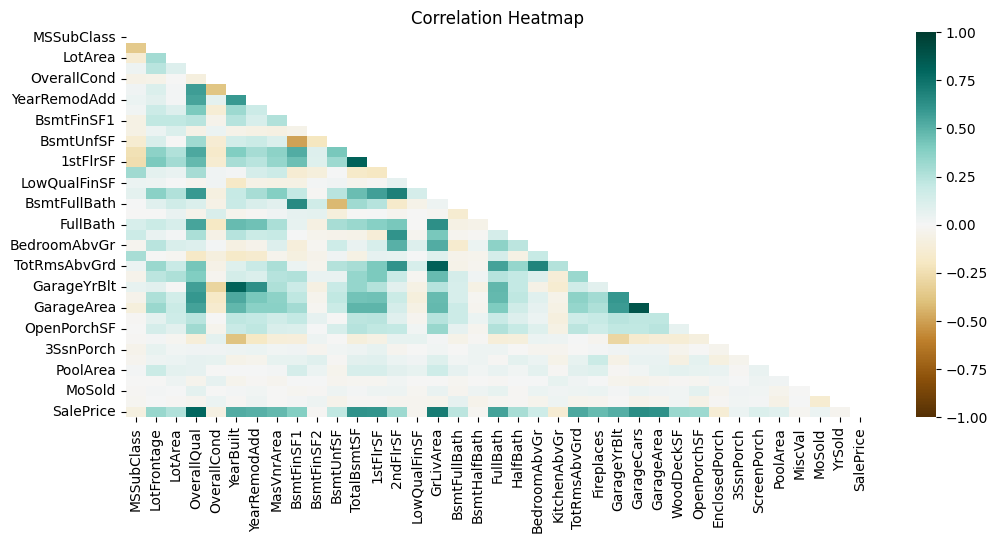

In [34]:
# Plot the lower trianlge of the correlation heatmap
numerical_df=df_train[list(df_train.dtypes[df_train.dtypes!="object"].index)]
plt.figure(figsize=(12, 5))

# Define the mask to set the values in the upper triangle to True
matrix = np.triu(np.ones_like(numerical_df.corr(), dtype=np.bool_))

heatmap = sns.heatmap(numerical_df.corr(), mask=matrix, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap')
plt.show()

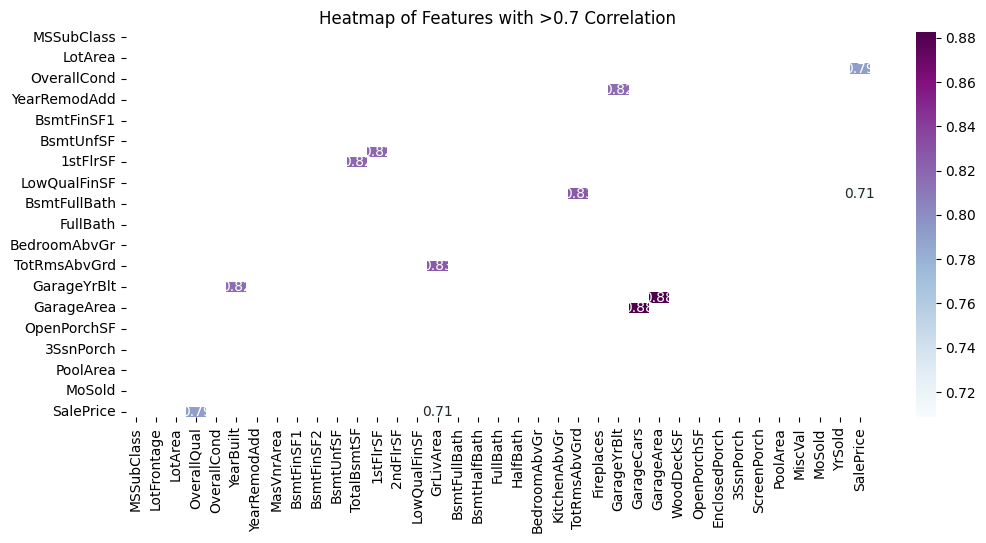

In [35]:
# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Identifying features where correlation is above 0.7
high_corr = (abs(corr_matrix) > 0.7) & (corr_matrix != 1)

# Plotting the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, mask=~high_corr, annot=True, cmap='BuPu')
plt.title('Heatmap of Features with >0.7 Correlation')
plt.show()

Highly correlated features (>0.75) are explainable, e.g., it is expected that properties that are rated high on OverallQual (overall material and finish of the house) would sell (SalePrice) at a higher price. Therefore, it's difficult at this stage to remove the highly correlated features to mitigate multicollinearity - feature selection algorithms will be adopted to reduce the feature space for improved generalisation purposes.

#### 3.4 Data Transformation

##### Log / Exponential Transformations

C:\Users\chame\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\chame\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\chame\OneDrive\Desktop\Test_Env_Data_Analysis\For_Porfolio\House Prices - Advanced Regression\house-prices-advanced-regression-techniques/scripts/data_prep\transformation.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 4))
C:\Users\chame\AppData\Local\Programs\Python\Python311\Lib\site-pa

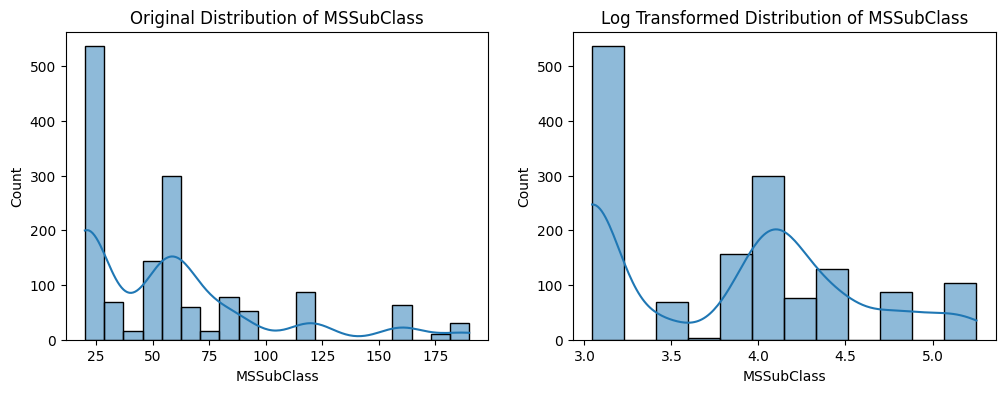

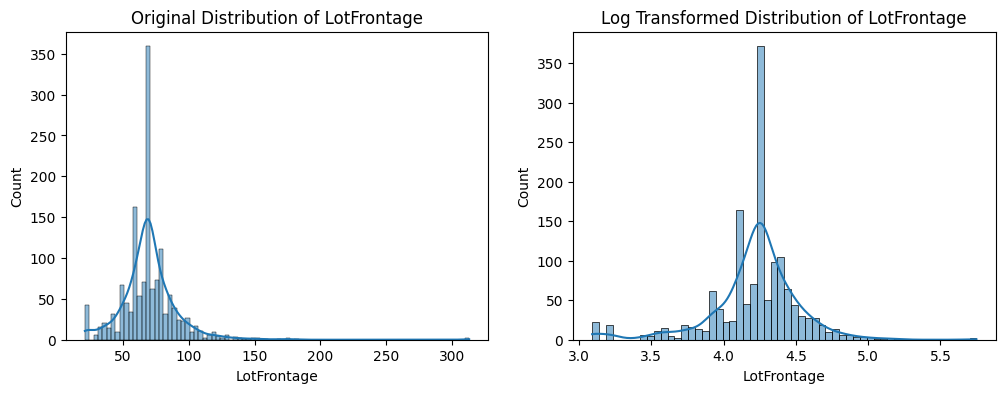

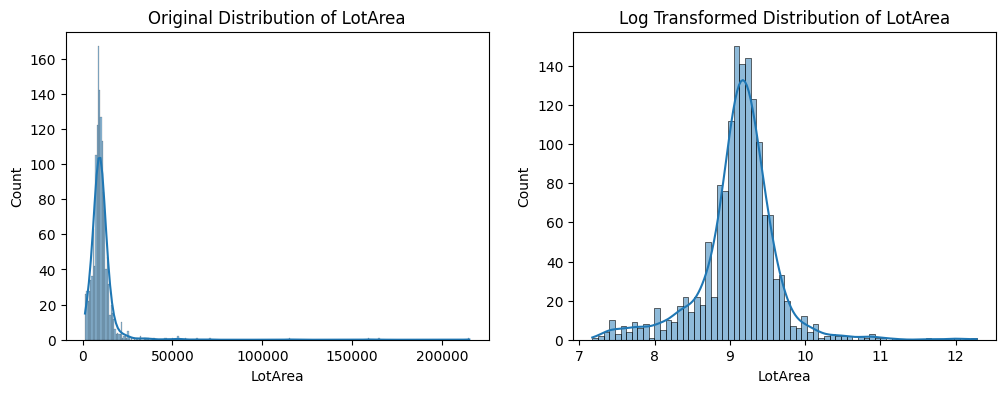

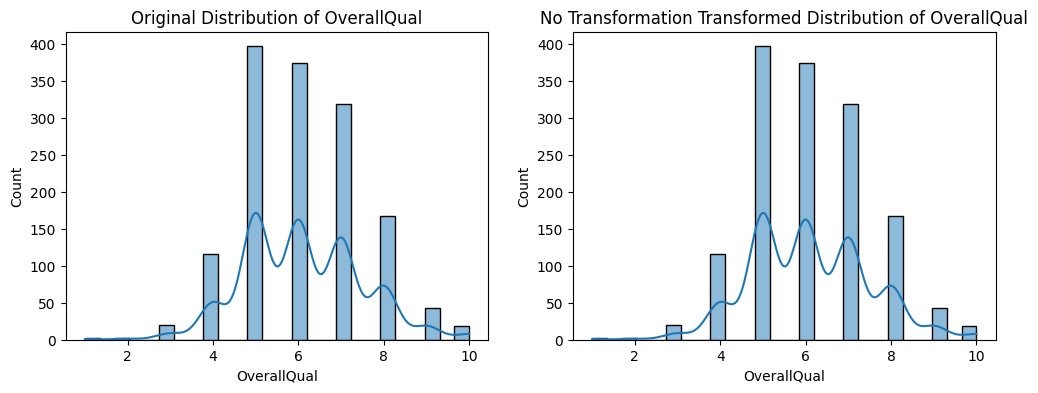

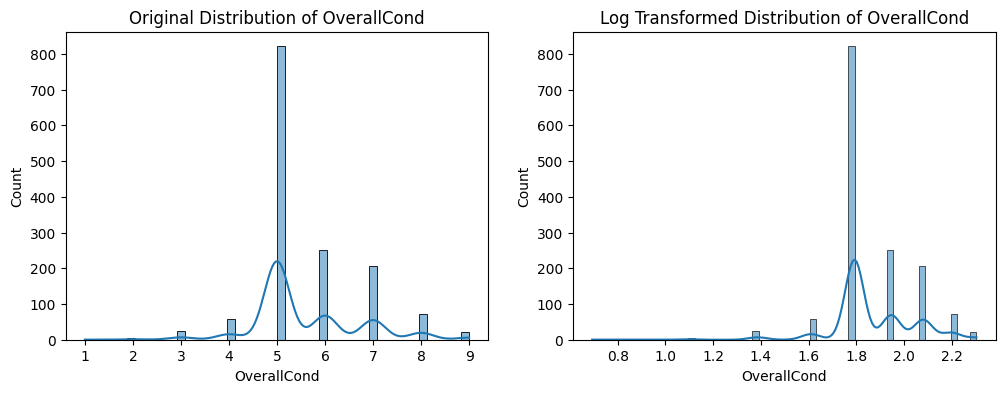

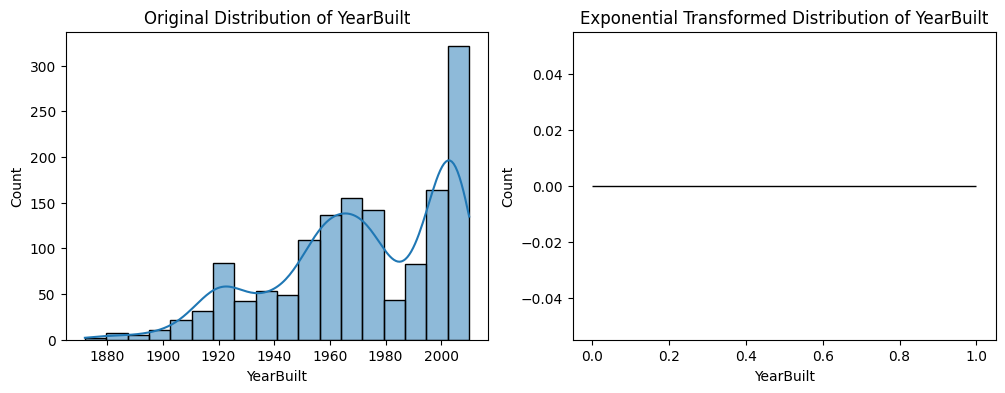

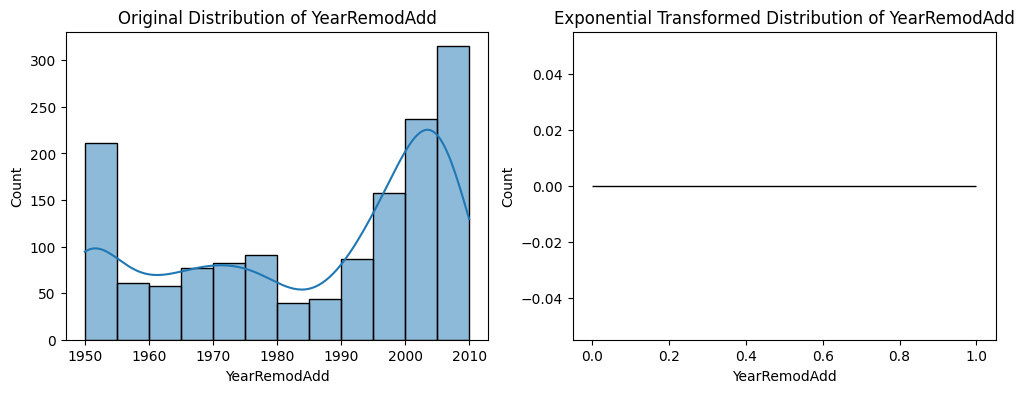

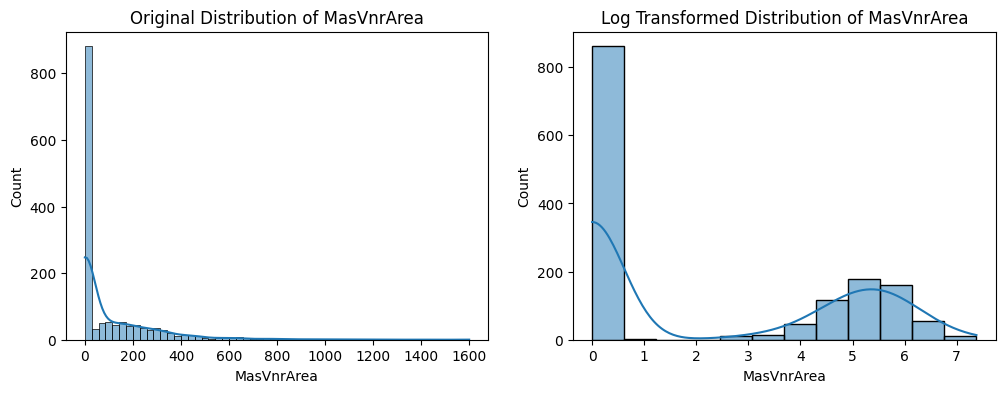

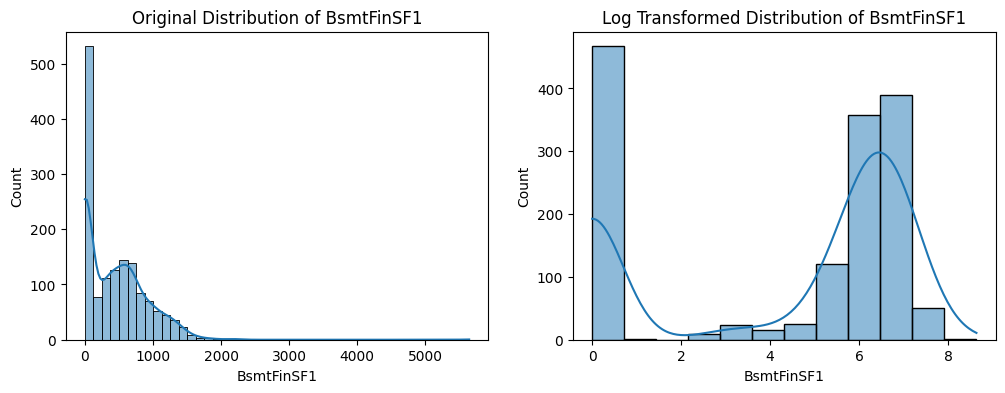

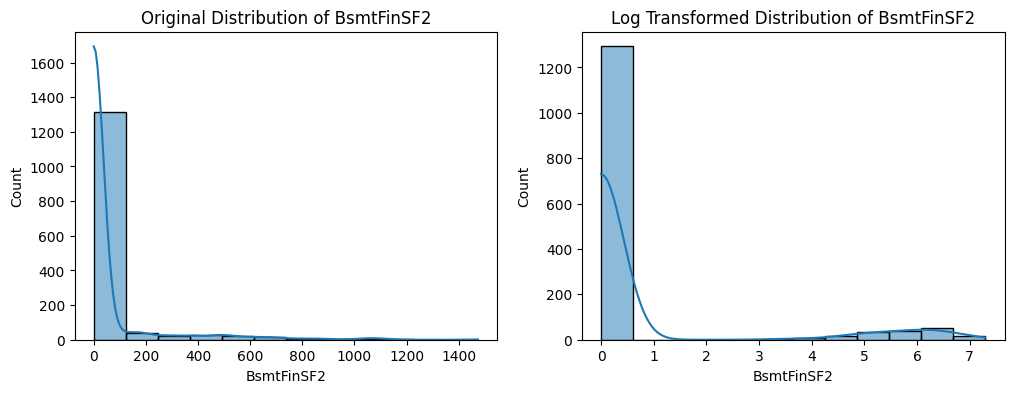

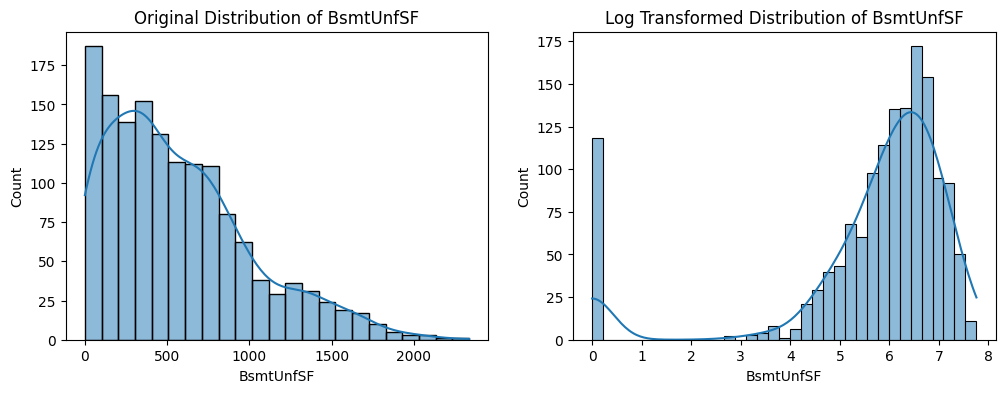

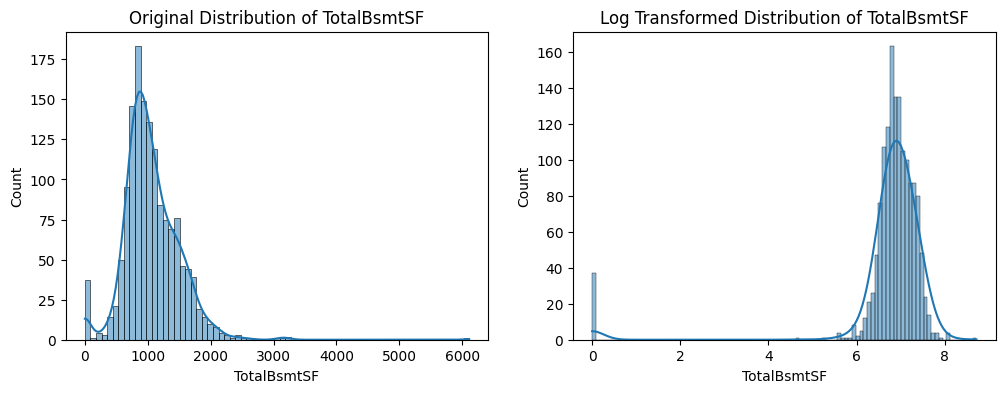

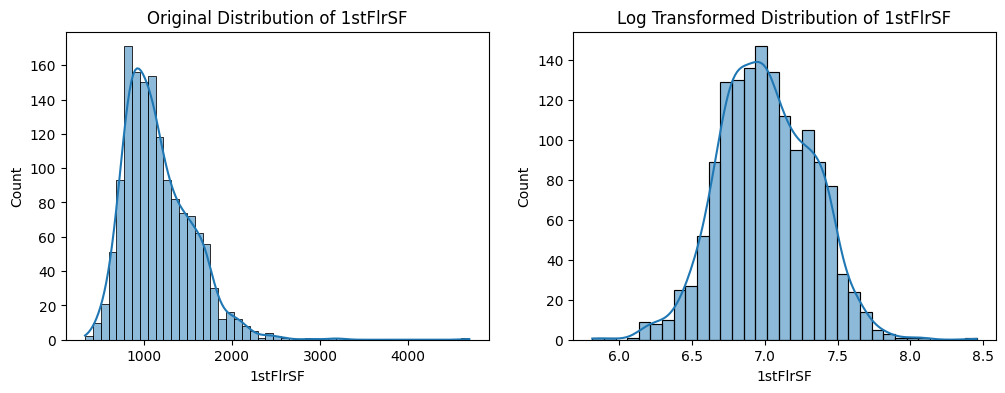

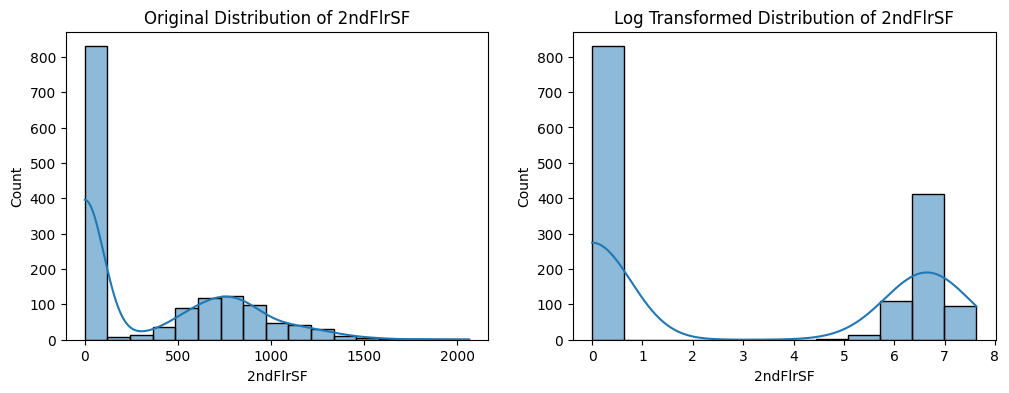

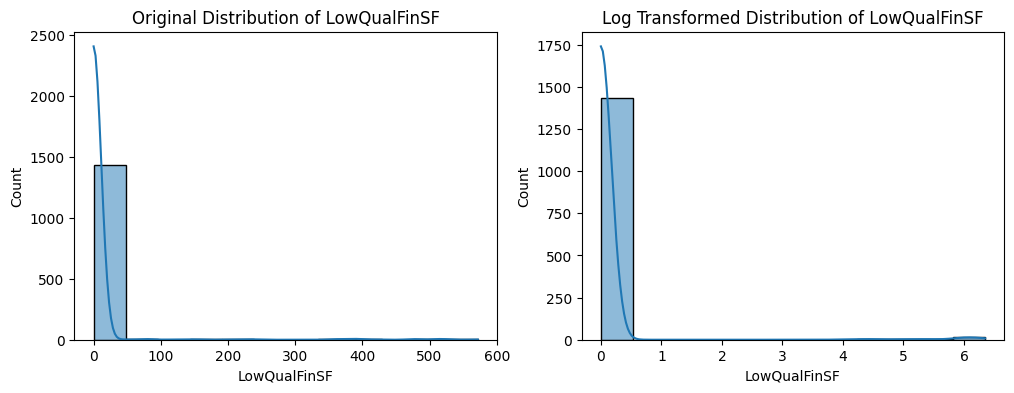

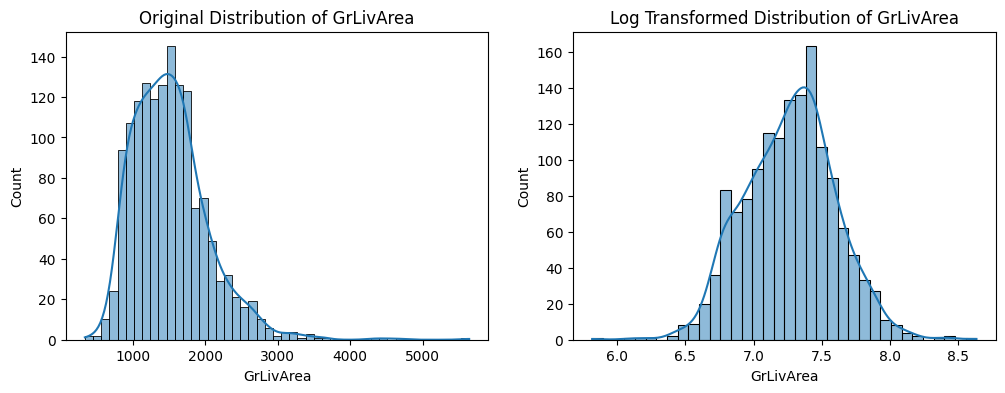

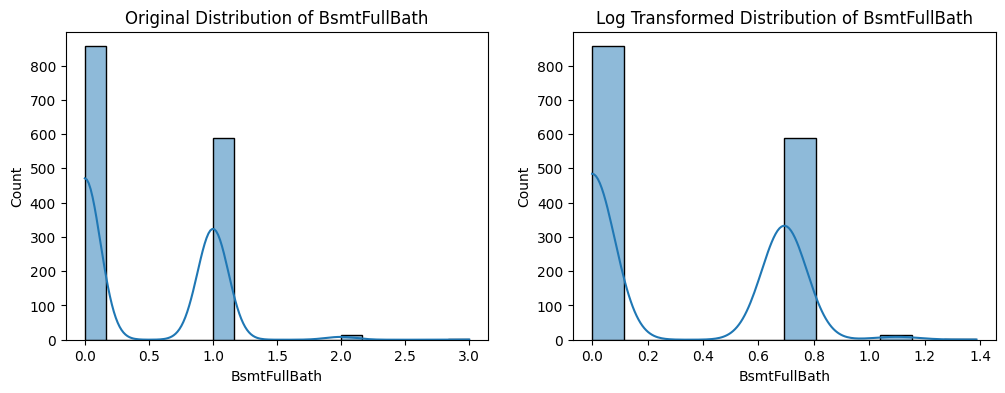

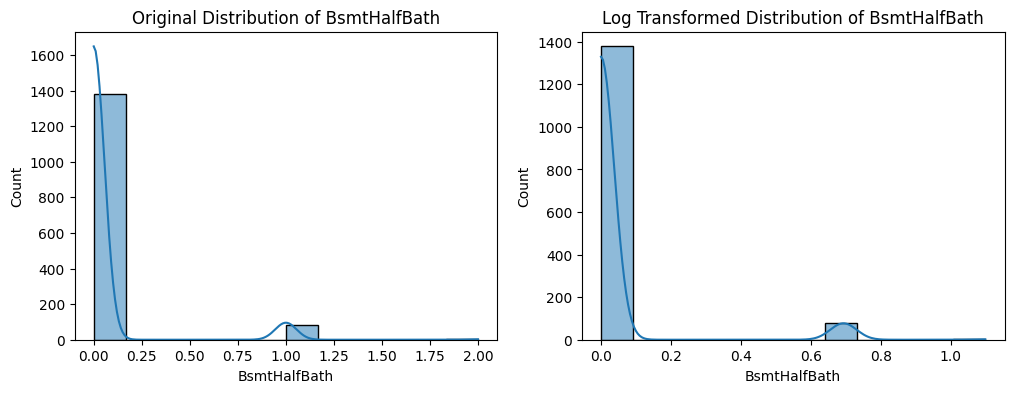

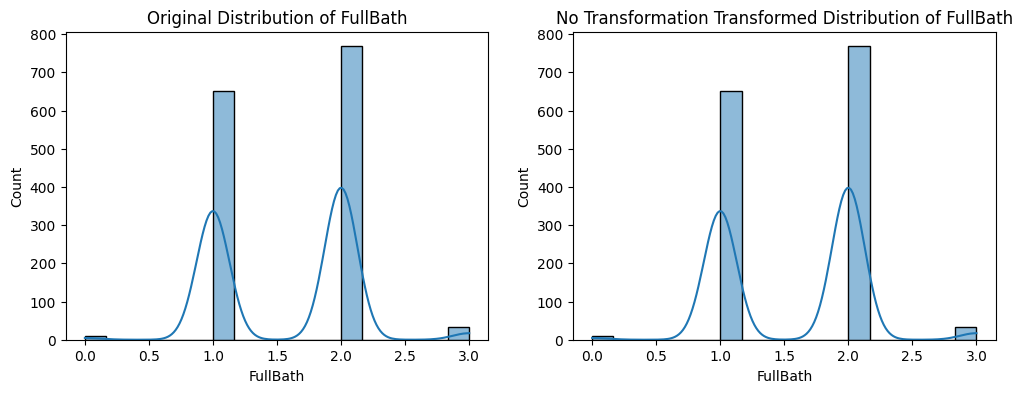

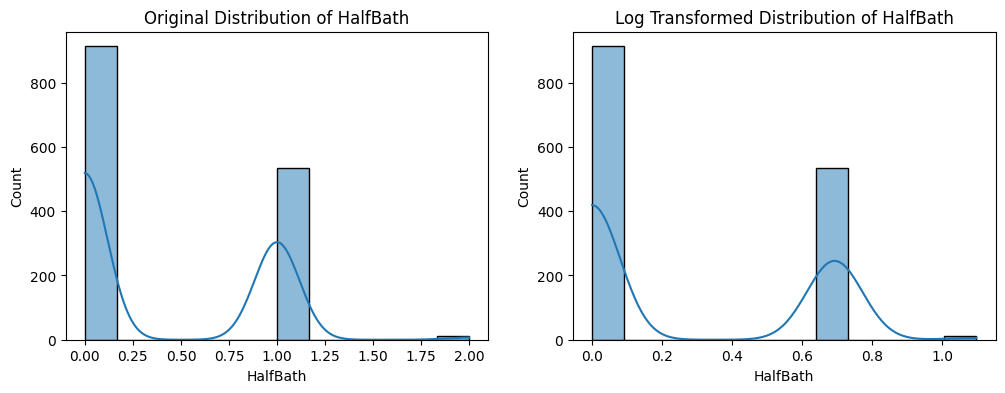

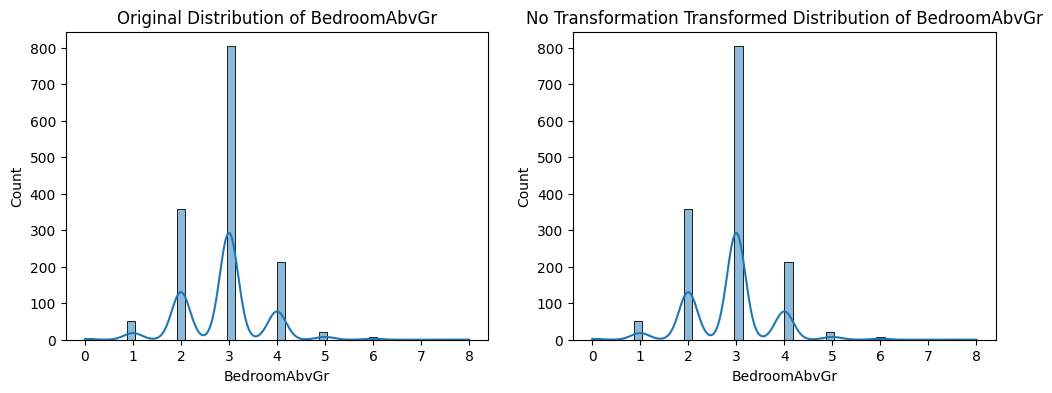

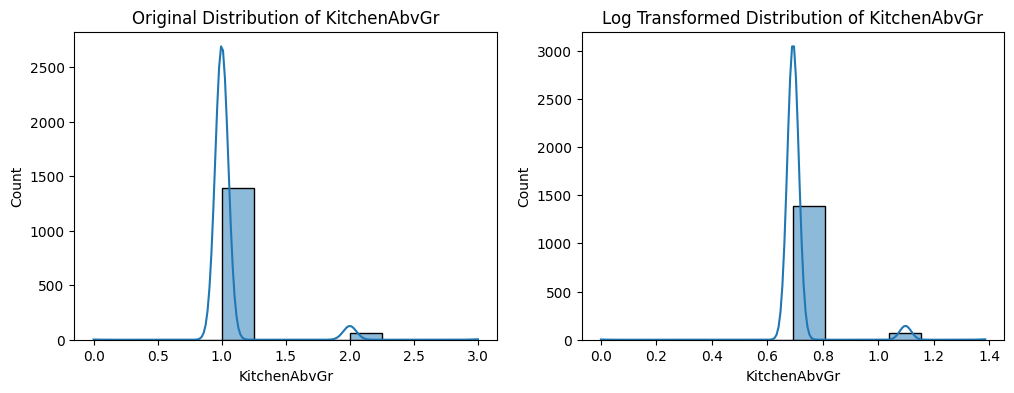

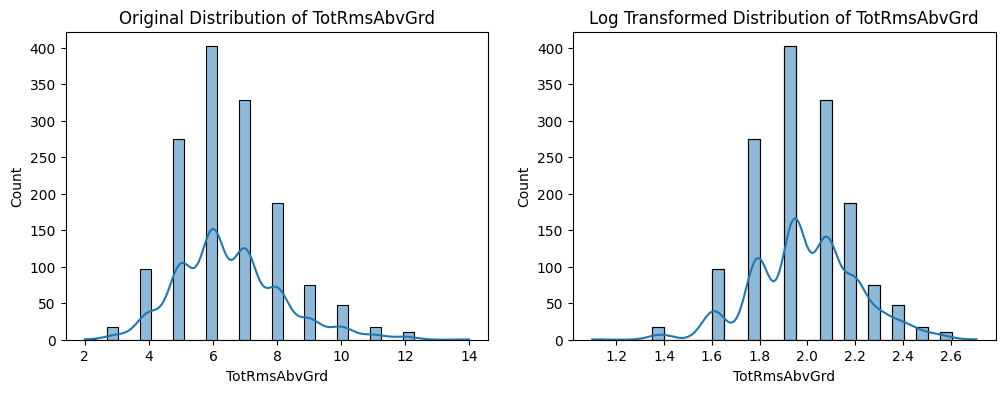

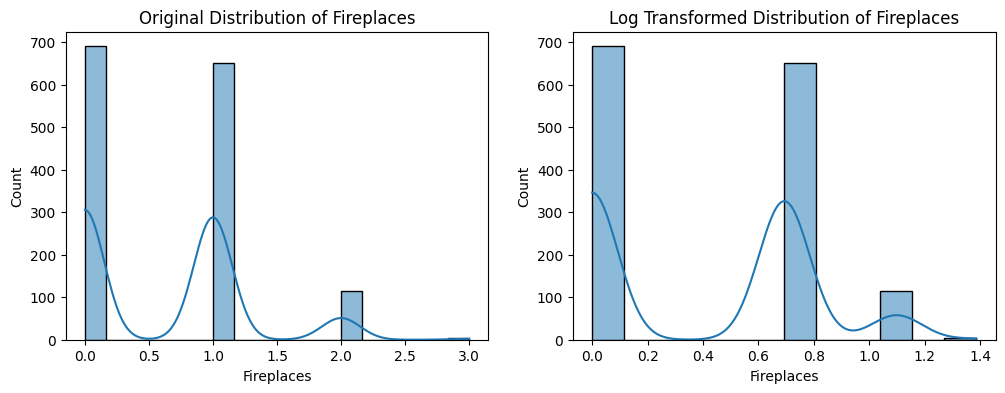

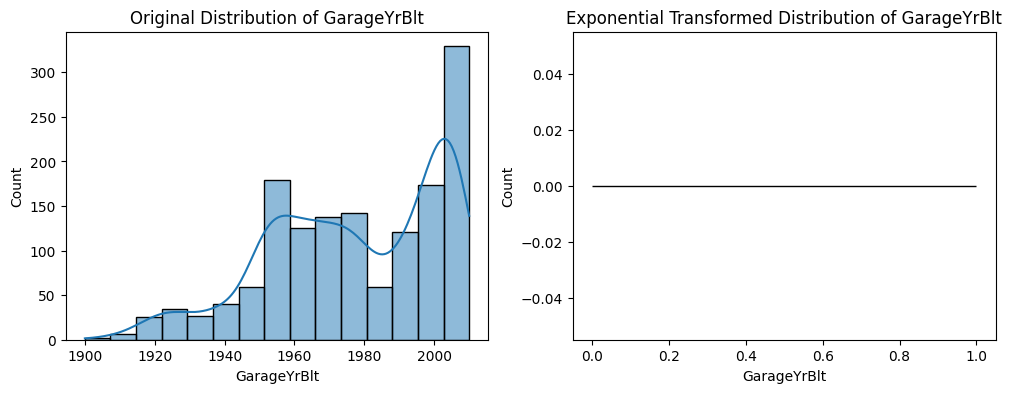

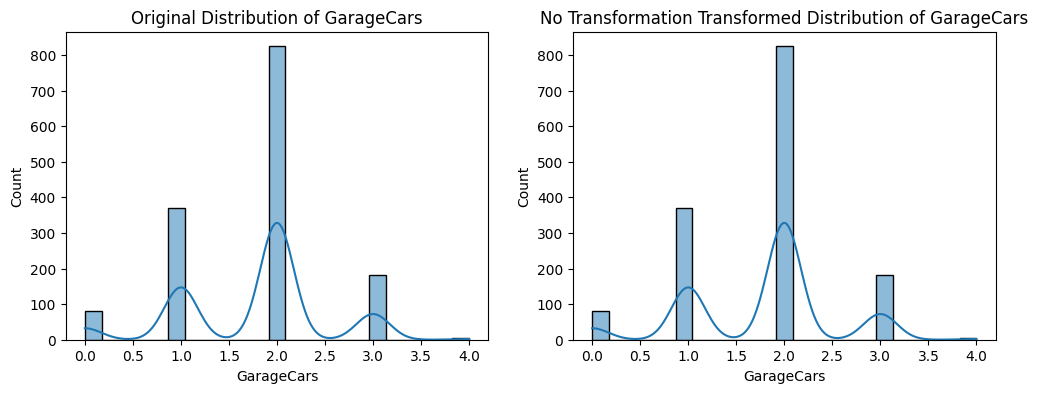

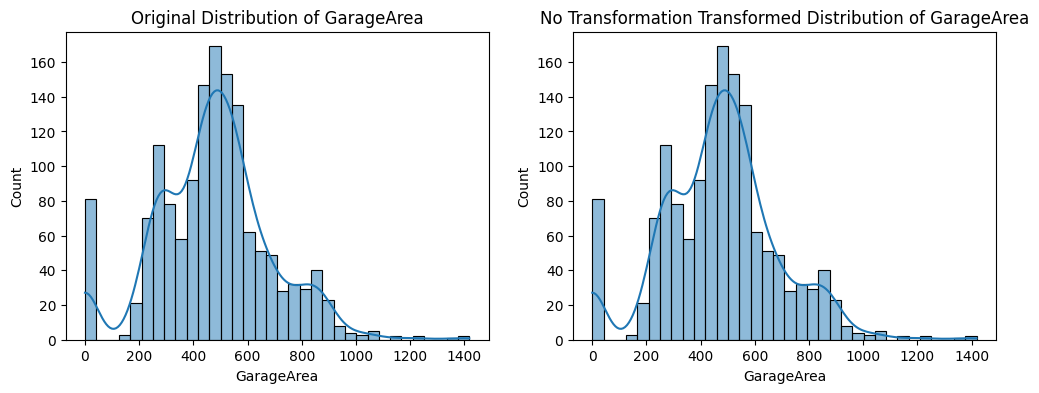

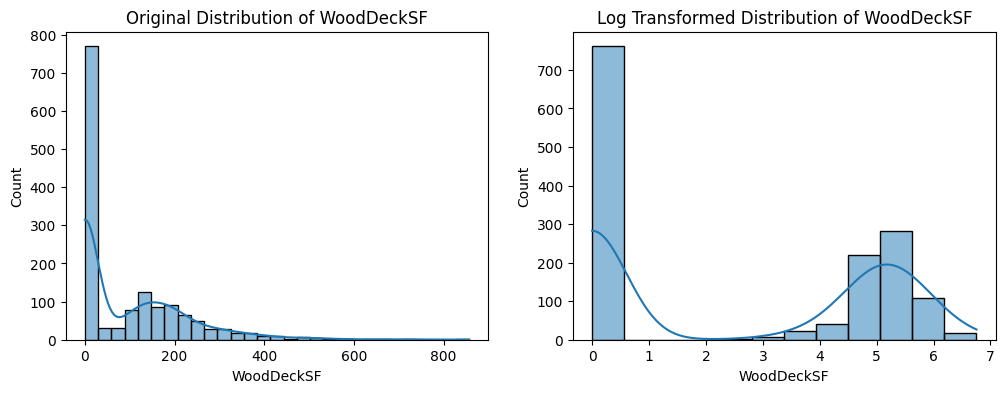

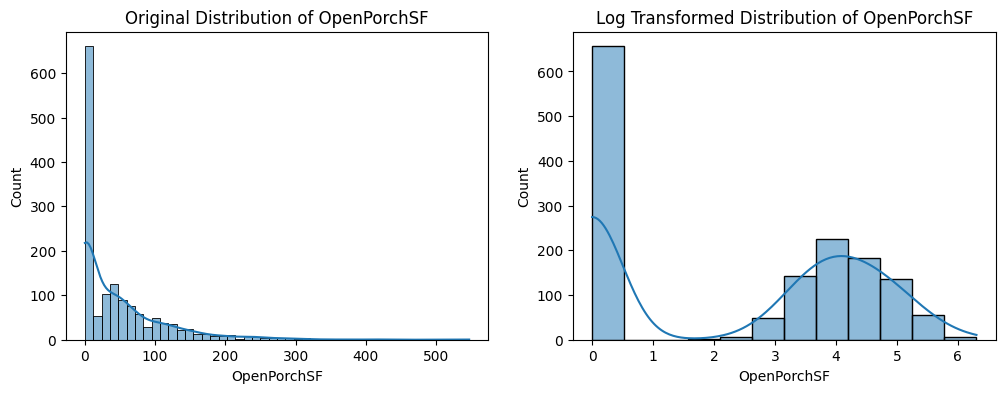

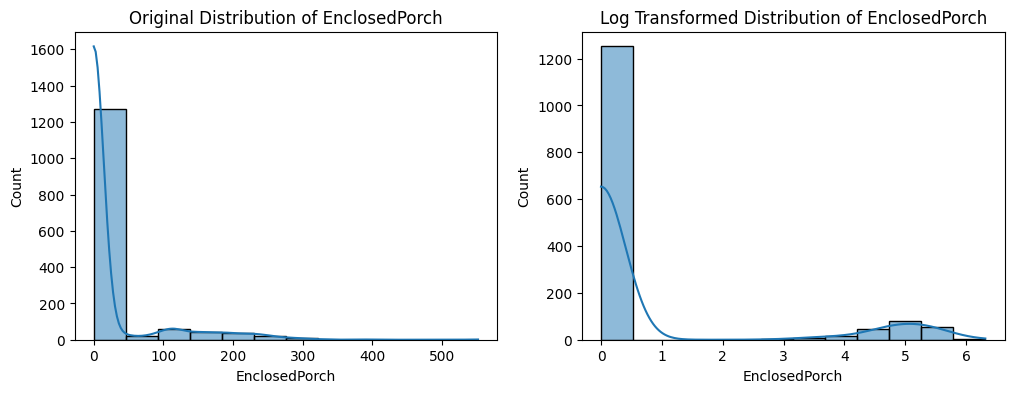

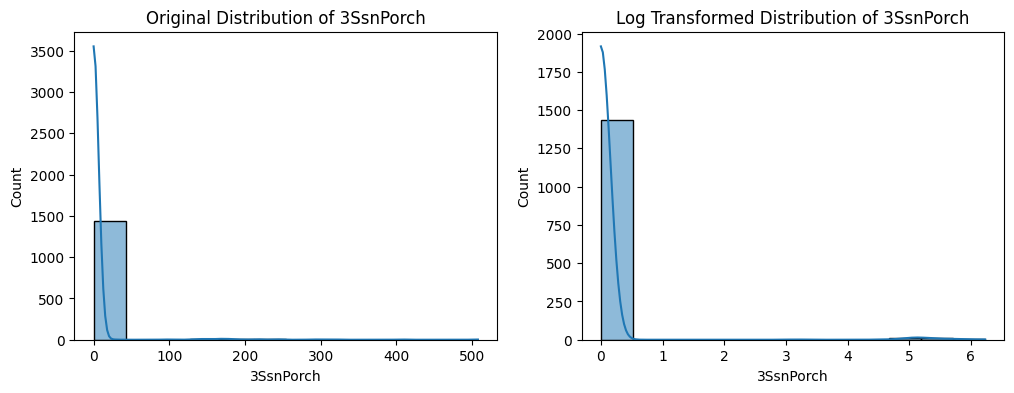

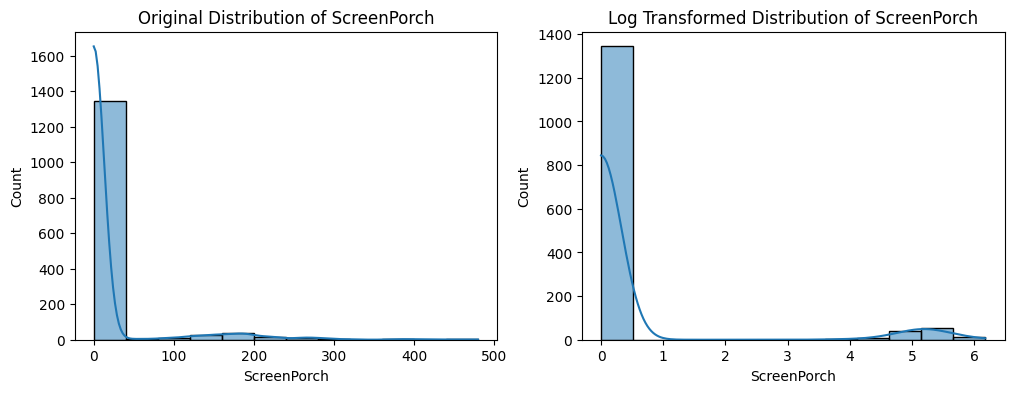

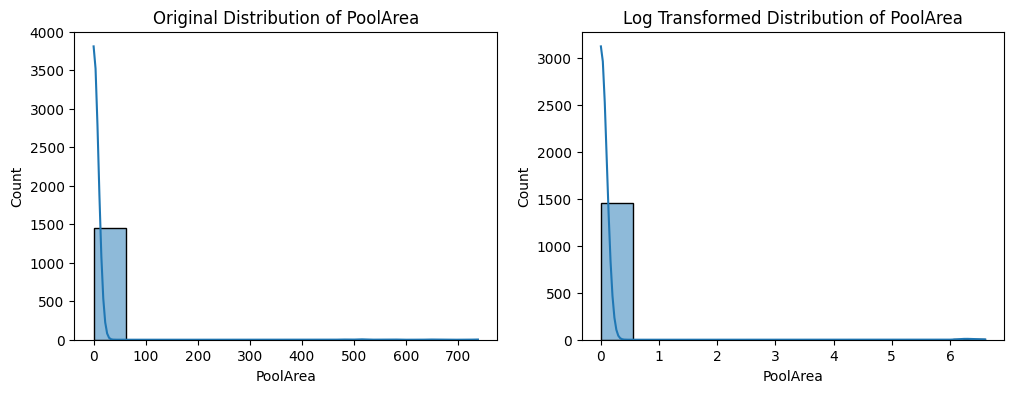

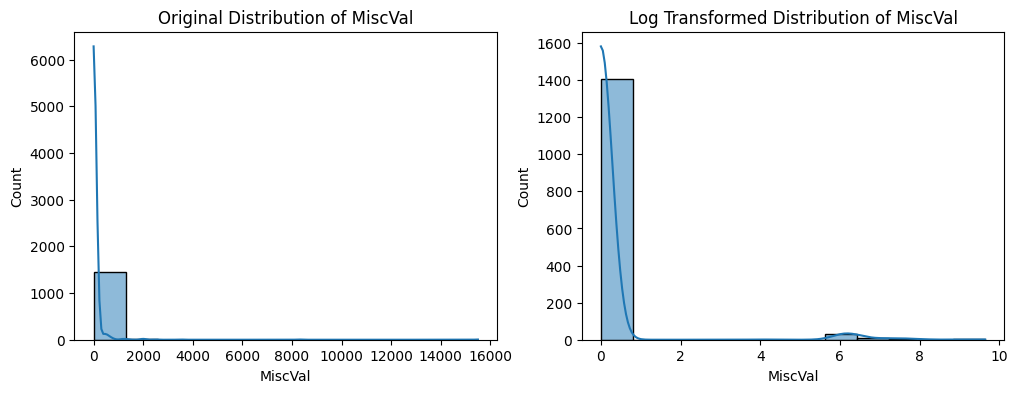

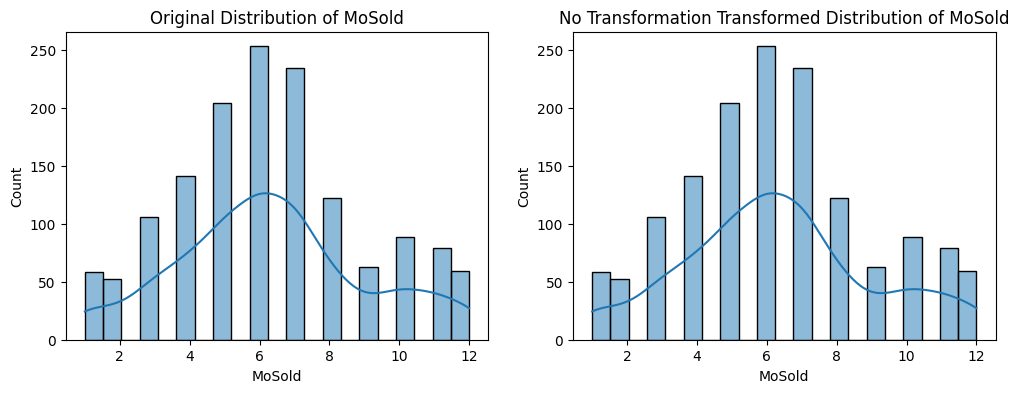

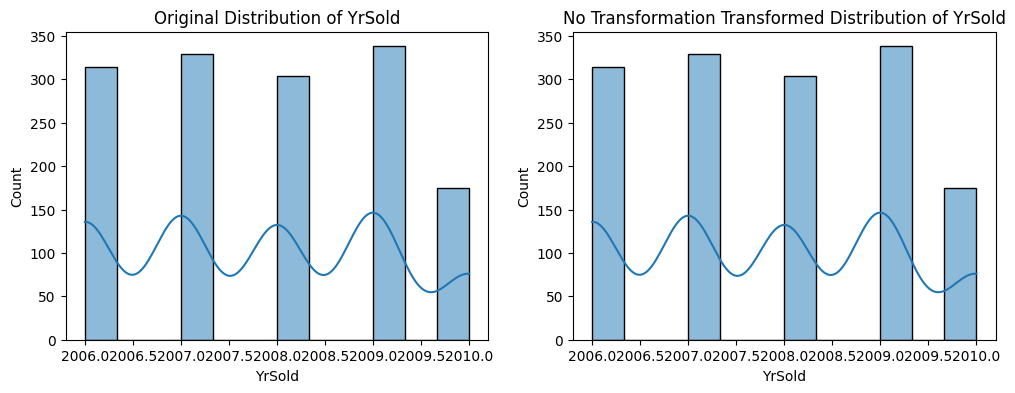

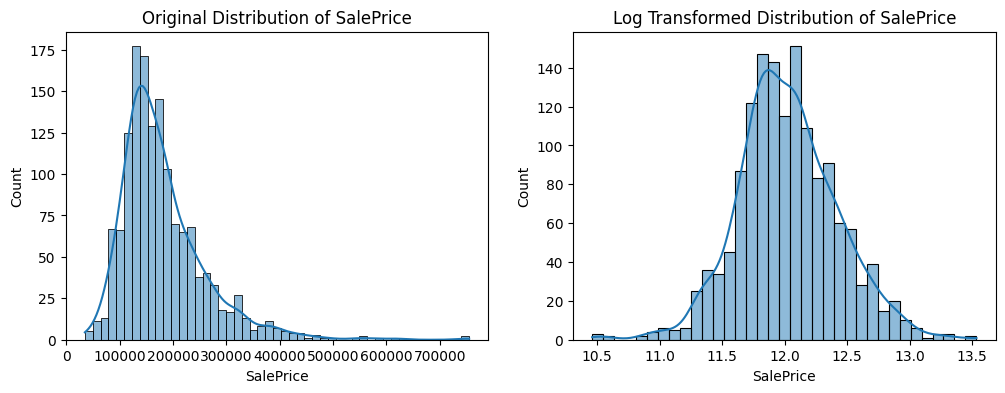

In [36]:
# Review whether log or expontential transformations are valid and identify features that may benefit from milder transformations
for col in list(numerical_df.columns):
    plot_and_transform_skewness_all_cols(numerical_df, col)

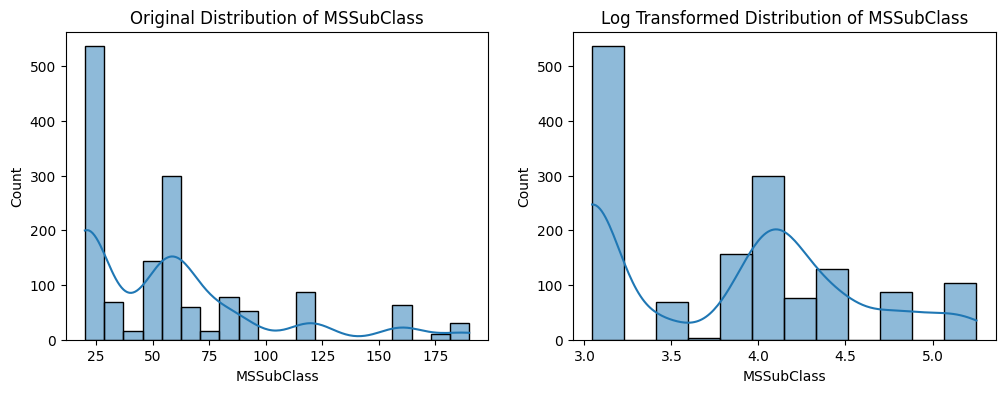

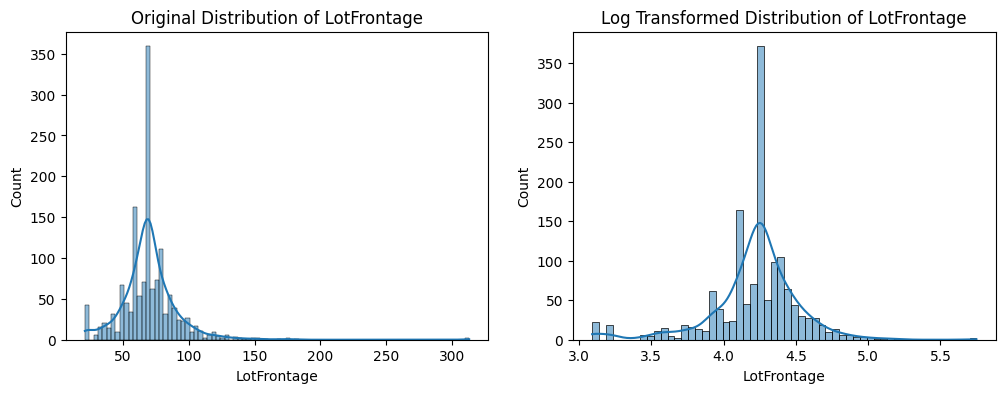

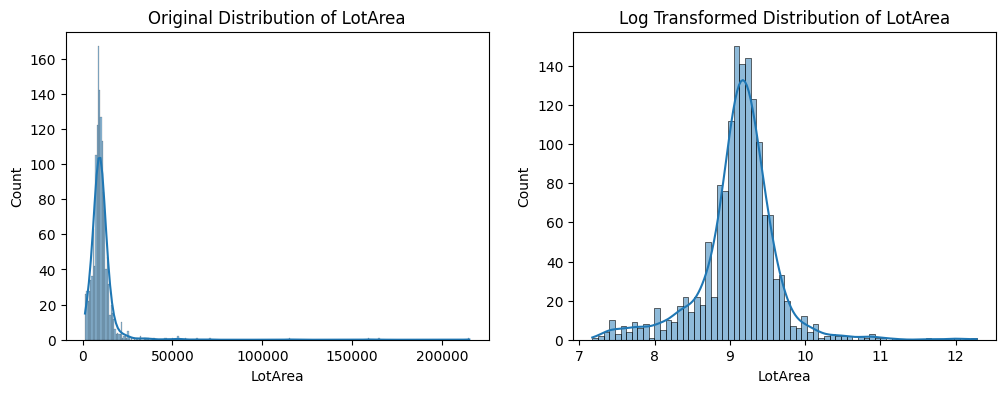

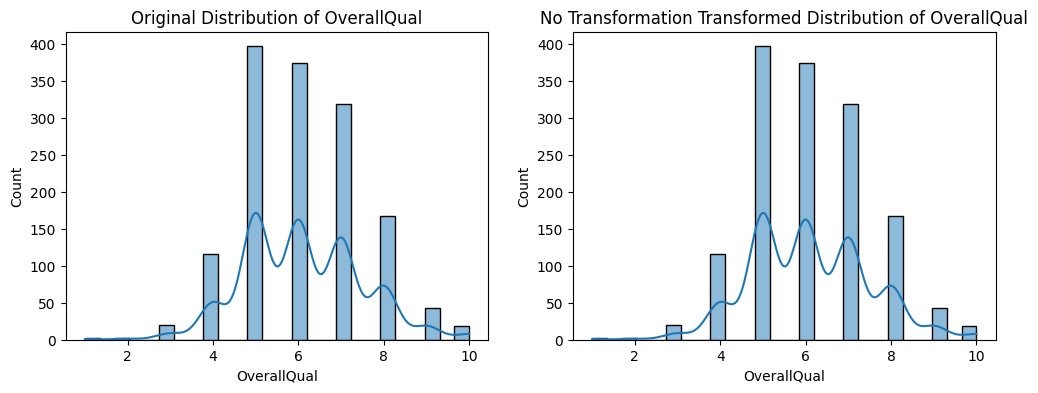

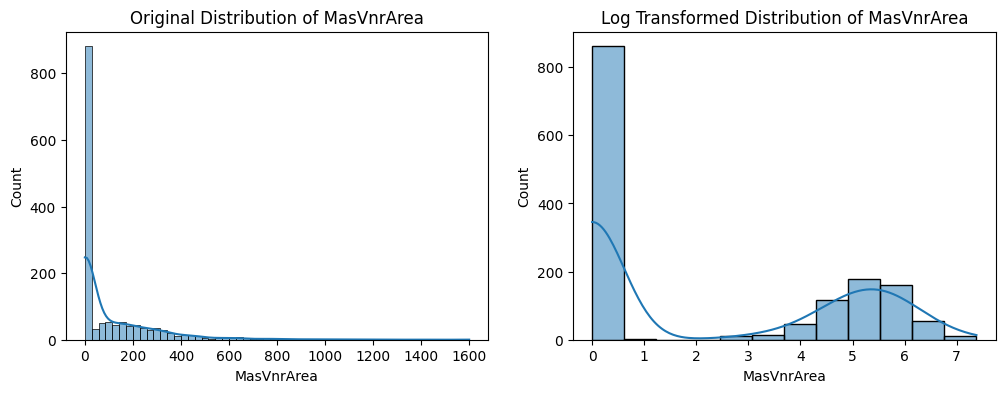

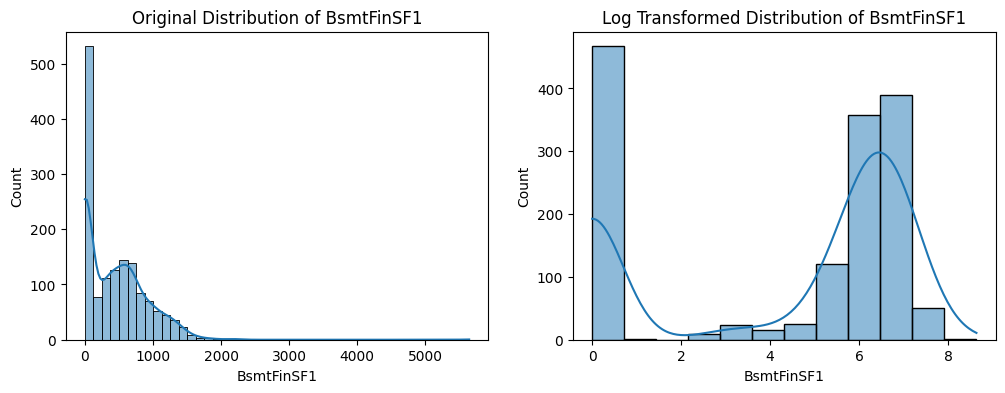

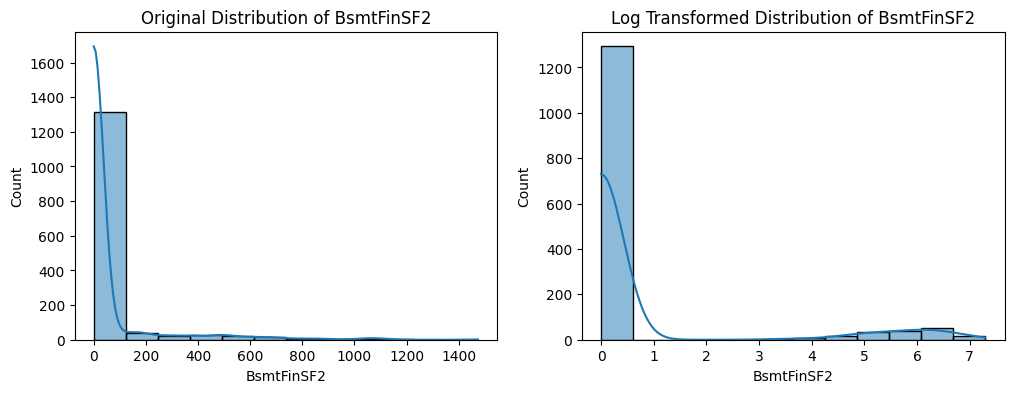

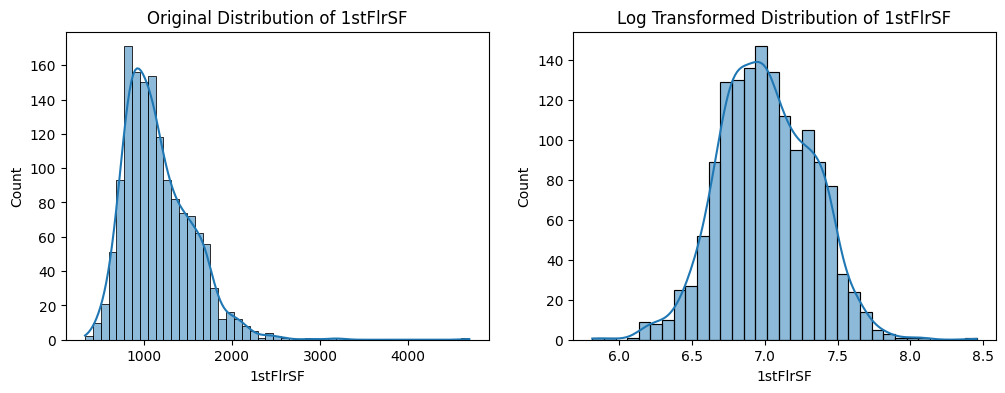

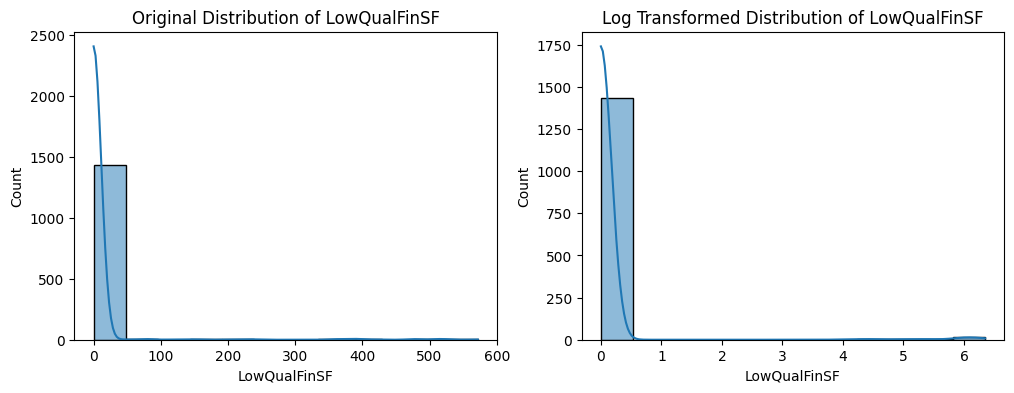

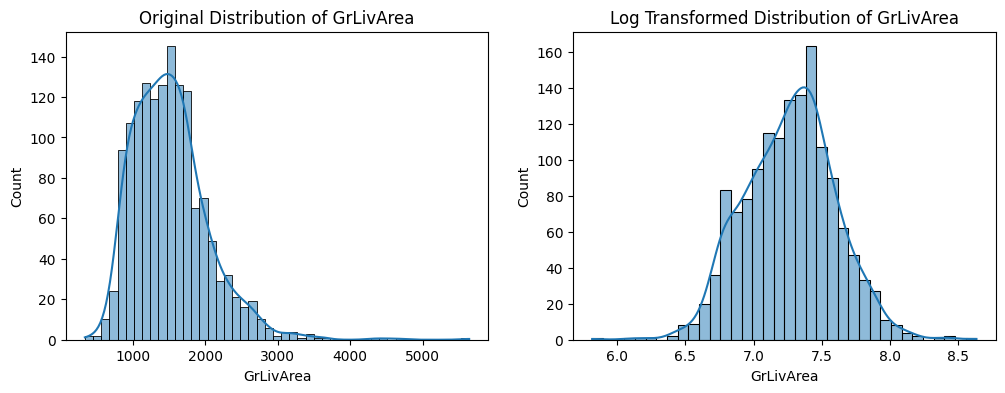

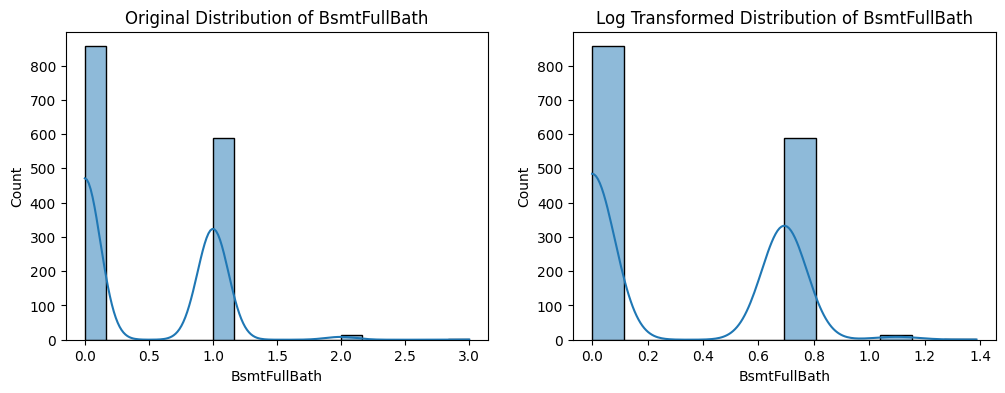

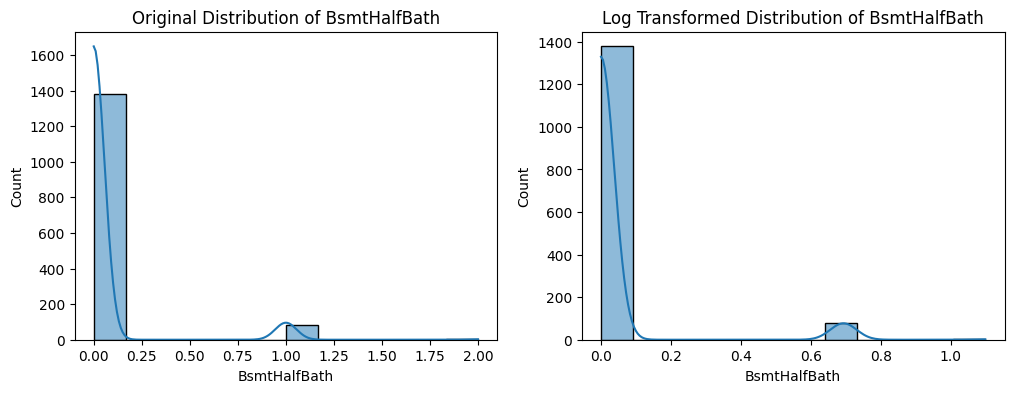

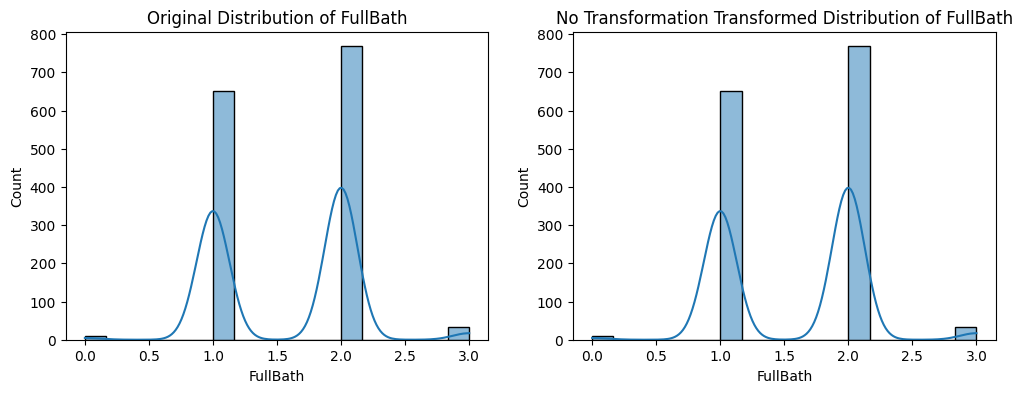

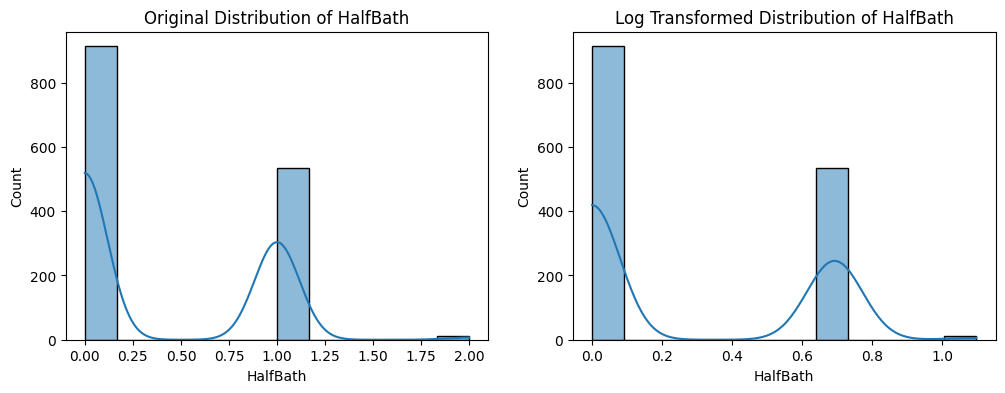

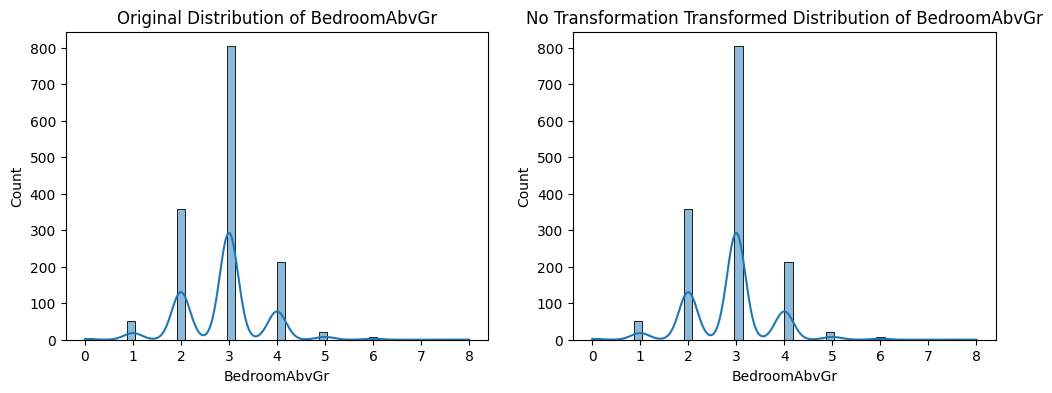

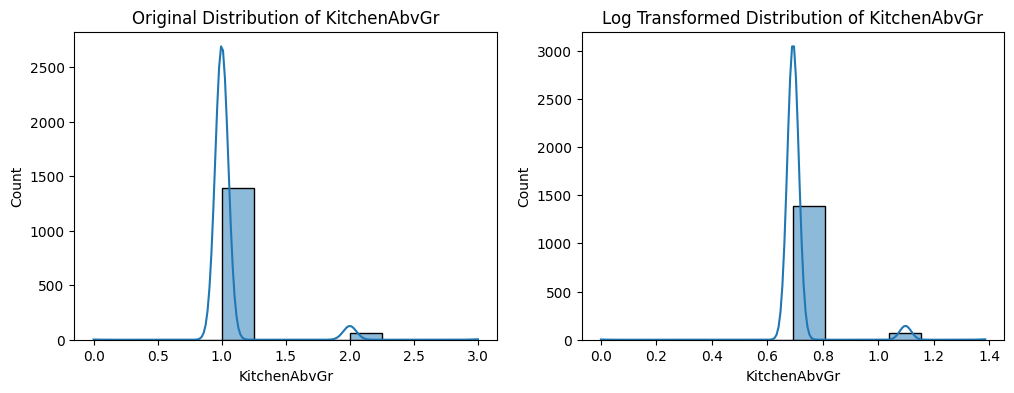

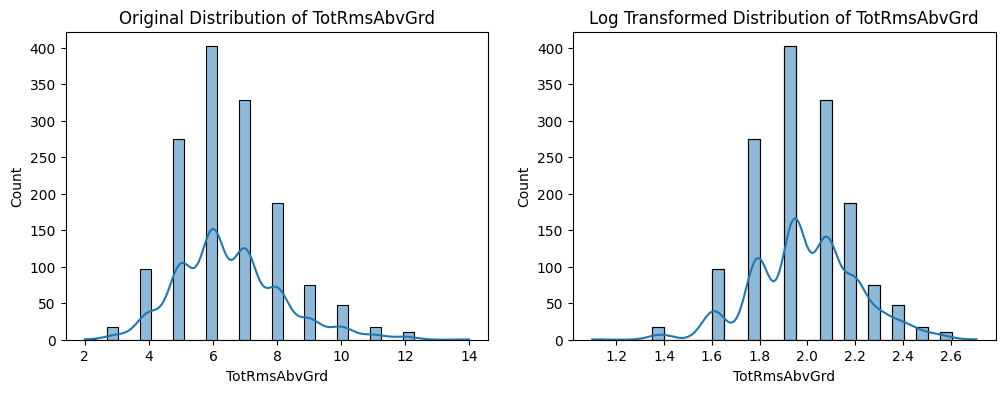

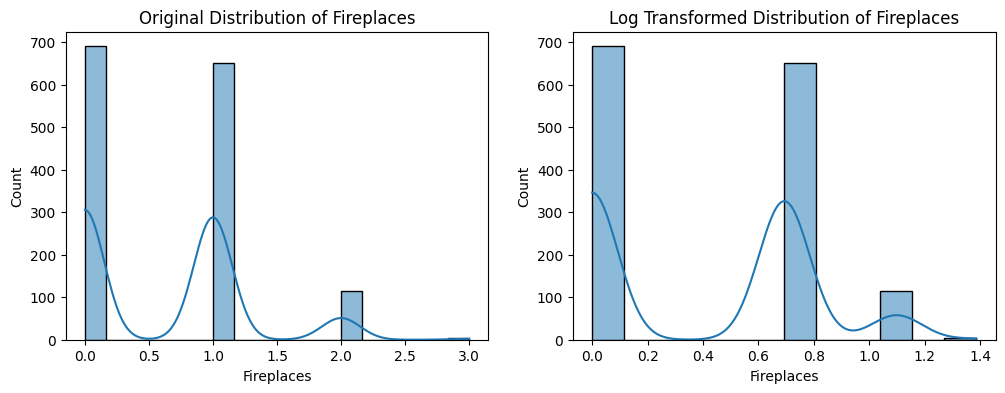

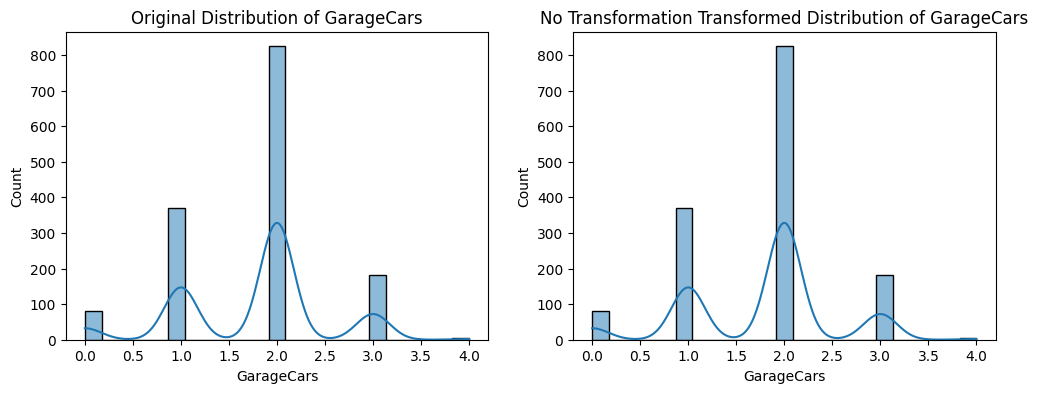

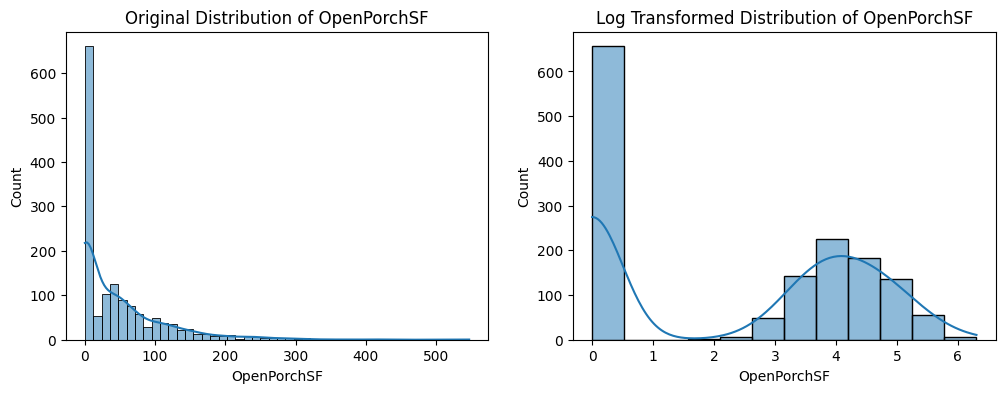

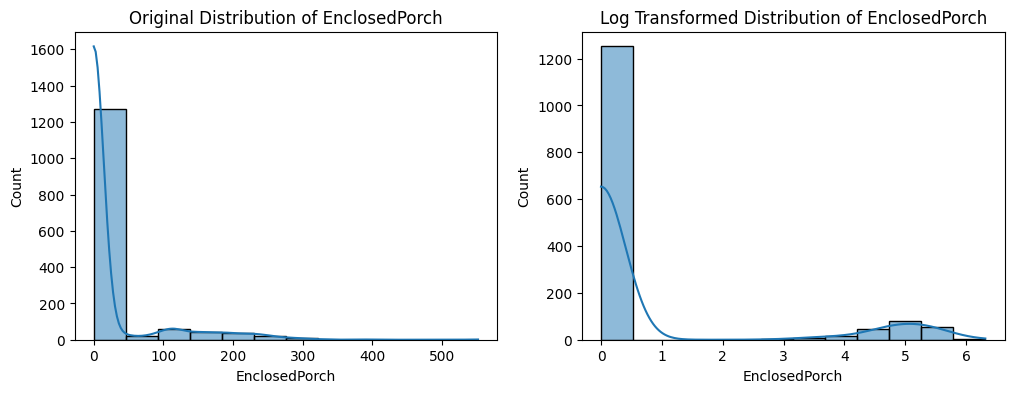

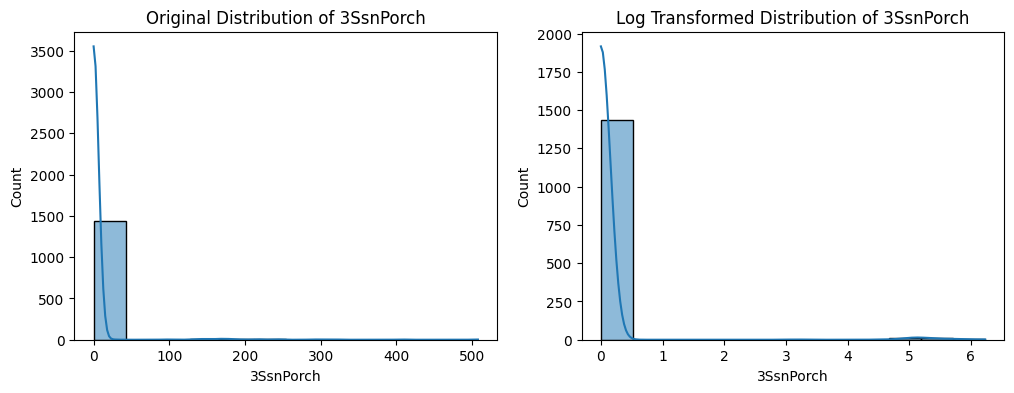

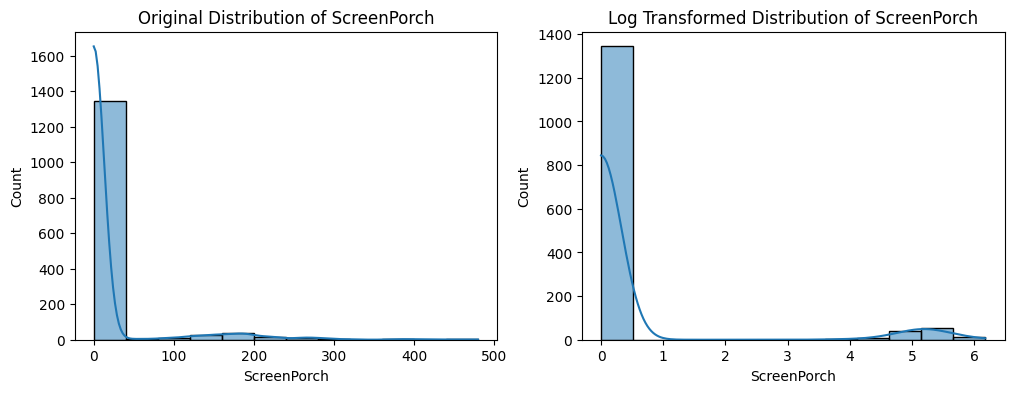

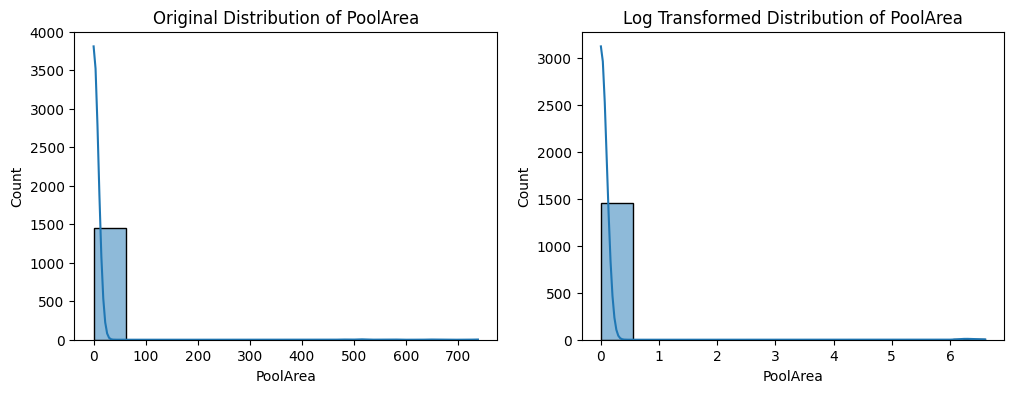

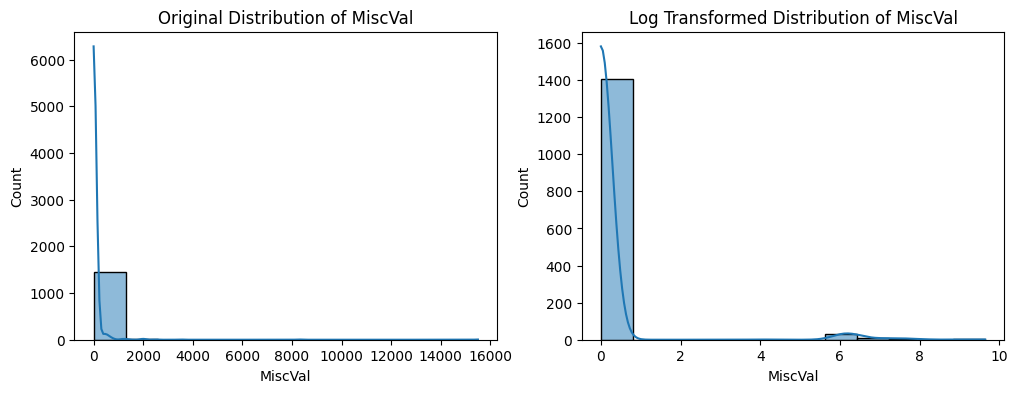

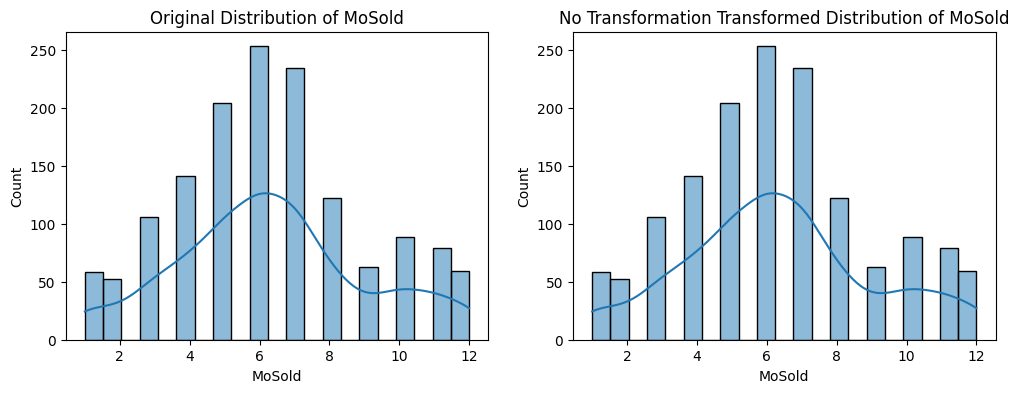

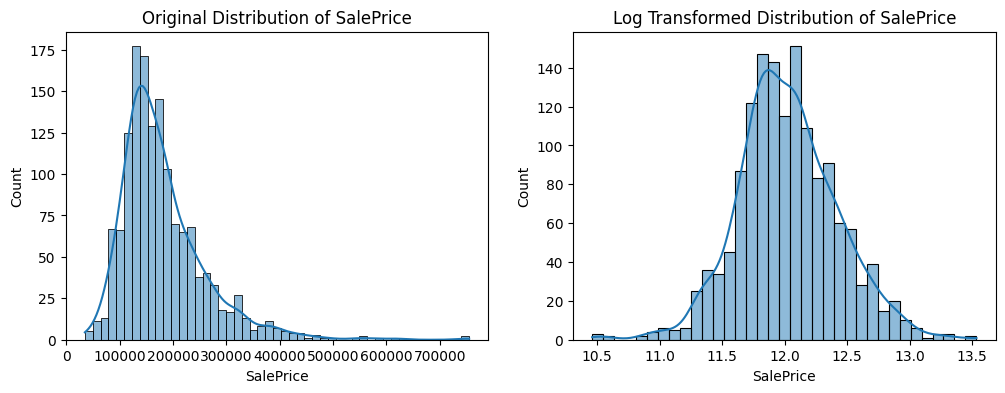

In [37]:
# Certain features will not be transformed as a result of their original distribution appearing gaussian or
# they are unsuitable for transformation (those containing year information)
cols_to_exclude=["OverallCond","YearBuilt","YearRemodAdd","GarageYrBlt","BsmtUnfSF","TotalBsmtSF","2ndFlrSF","GarageArea","WoodDeckSF", "YrSold"]
numerical_df_transformed, transformation_type = plot_and_transform_skewness_specific_cols(numerical_df, cols_to_exclude)

In [38]:
# Review transformation type of the target variable
transformation_type['SalePrice']

'Log'

In [39]:
# Save to file
save_list_to_file(cols_to_exclude, project_path+"/data/feature_selection/", "features_to_exclude_from_log_exp_transformation.txt")

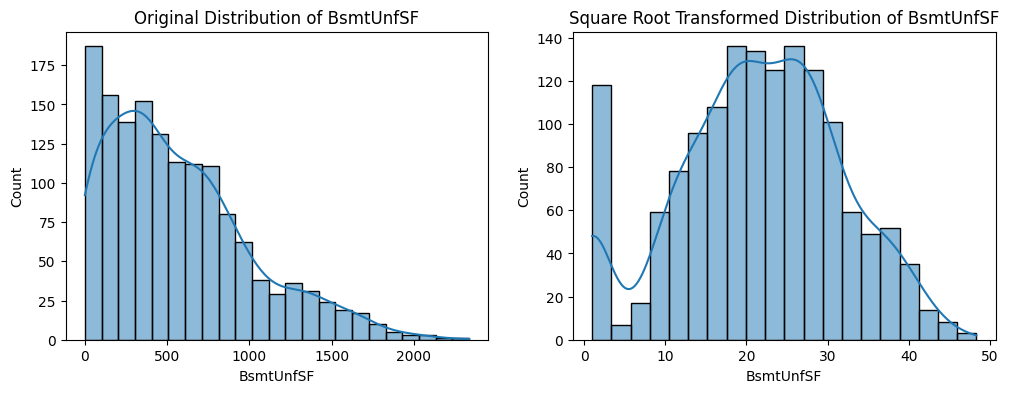

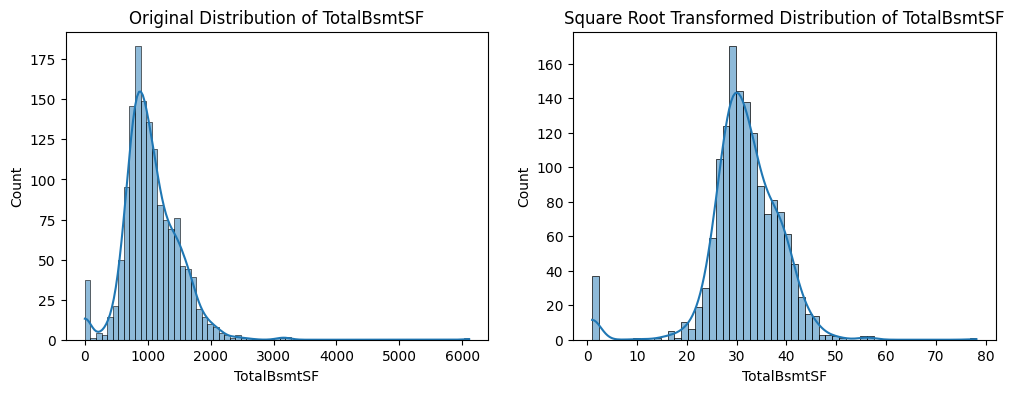

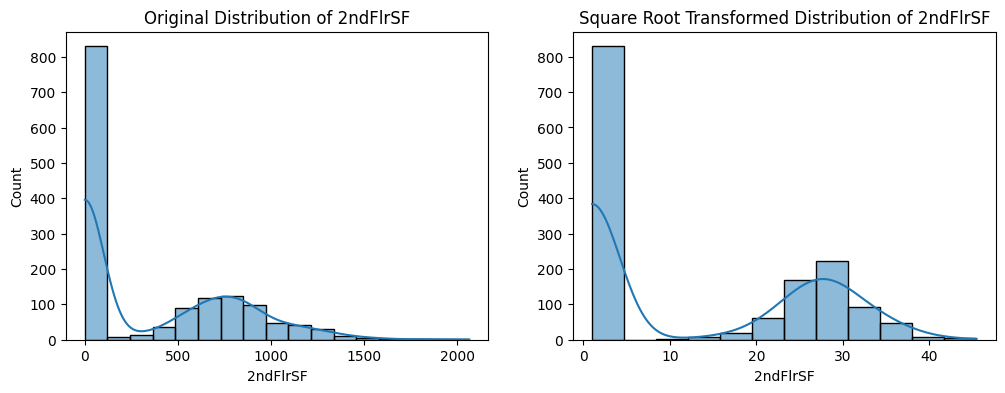

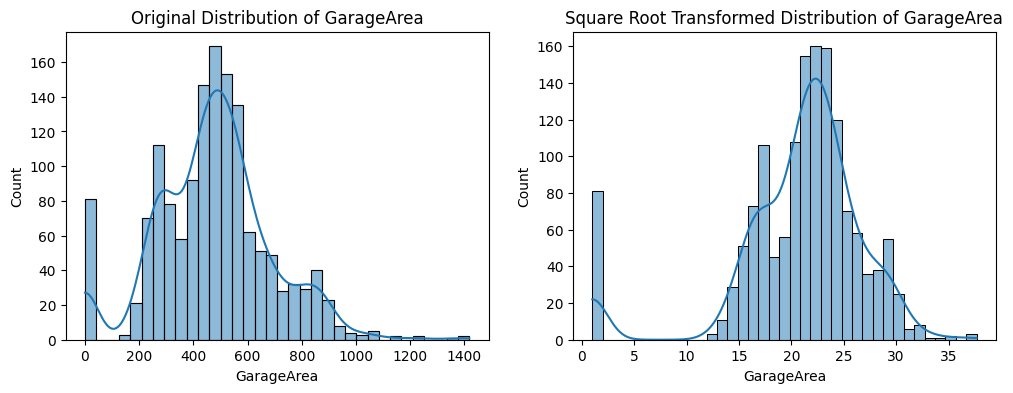

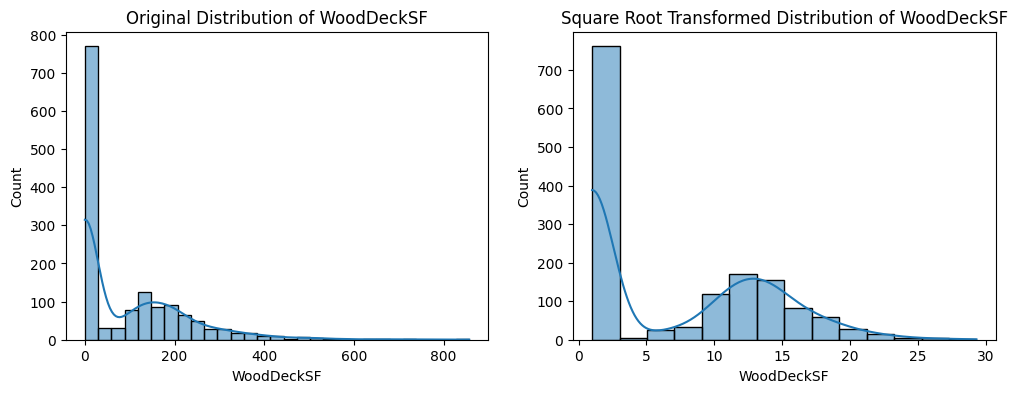

In [40]:
# Square_root_transformation
square_root_transformation_list=["BsmtUnfSF","TotalBsmtSF","2ndFlrSF","GarageArea","WoodDeckSF"]

numerical_df_transformed=plot_square_root_transformation(numerical_df_transformed, square_root_transformation_list)

In [41]:
# Save to file
save_list_to_file(square_root_transformation_list, project_path+"/data/feature_selection/", "features_for_square_root_transformation.txt")

In [42]:
# Extremely skewed
ES_right=["MasVnrArea","BsmtFinSF1","BsmtFinSF2","LowQualFinSF","BsmtHalfBath","OpenPorchSF",
          "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]
# ES_left=["","",]

### Thoughts:
- Most numerical features' distribution are now gaussian like reducing the impact of outliers

##### Linearity between independent variables and target

In [43]:
numerical_df_transformed.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.730254
GarageCars       0.680625
GarageArea       0.612508
1stFlrSF         0.608955
FullBath         0.594771
YearBuilt        0.586570
TotalBsmtSF      0.584016
YearRemodAdd     0.565608
GarageYrBlt      0.561224
TotRmsAbvGrd     0.539998
Fireplaces       0.508925
OpenPorchSF      0.459948
MasVnrArea       0.419942
LotArea          0.399923
WoodDeckSF       0.354837
LotFrontage      0.346237
HalfBath         0.320925
2ndFlrSF         0.247846
BsmtFullBath     0.238945
BsmtUnfSF        0.213091
BedroomAbvGr     0.209043
BsmtFinSF1       0.208099
ScreenPorch      0.105857
PoolArea         0.069949
3SsnPorch        0.058827
MoSold           0.057330
BsmtHalfBath    -0.004890
MSSubClass      -0.020279
BsmtFinSF2      -0.030361
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.054513
MiscVal         -0.067054
KitchenAbvGr    -0.144278
EnclosedPorch   -0.207263
Name: SalePrice, dtype: float64

##### Normalization

In [49]:
# Scale the numerical values and replace these features back into the main train dataset. Note: to enable inverse scaling the target
# label is scaled separately
numerical_df_transformed_noSalePrice = numerical_df_transformed.drop(columns="SalePrice")
numerical_df_transformed_SalePriceonly = numerical_df_transformed[["SalePrice"]]

numerical_df_transformed_scaled_noSalePrice, scaler_object_noSalePrice = scale_numerical_features(numerical_df_transformed_noSalePrice)
numerical_df_transformed_scaled_SalePriceonly, scaler_object_SalePriceonly = scale_numerical_features(numerical_df_transformed_SalePriceonly)

In [50]:
# Create a copy of the train dataset
df_train_scaled = df_train.copy()

In [51]:
# Replace scaled features back into the main dataset
df_train_scaled.loc[:,list(numerical_df_transformed_noSalePrice.columns)] = numerical_df_transformed_scaled_noSalePrice
df_train_scaled.loc[:,list(numerical_df_transformed_SalePriceonly.columns)] = numerical_df_transformed_scaled_SalePriceonly

df_train_scaled.head()

MSSubClass MSZoning  LotFrontage   LotArea Street            Alley  \
0    0.424462       RL    -0.078896 -0.133270   Pave  No alley access   
1   -1.125202       RL     0.572719  0.113413   Pave  No alley access   
2    0.424462       RL     0.062541  0.420049   Pave  No alley access   
3    0.645073       RL    -0.329561  0.103317   Pave  No alley access   
4    0.424462       RL     0.726089  0.878431   Pave  No alley access   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story     0.651479    -0.517200   1.050994   
1       Norm     1Fam     1Story    -0.071836     2.179628   0.156734   
2       Norm     1Fam     2Story     0.651479    -0.517200   0.984752   
3       Norm     1Fam     2Story     0.651479    -0.517200  -1.863632   
4       Norm     1Fam     2Story     1.374795    -0.517200   0.951632   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0      0.878668     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1     -0.429577     Gable  CompShg     MetalSd     MetalSd       None   
2      0.830215     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3     -0.720298     Gable  CompShg     Wd Sdng     Wd Shng       None   
4      0.733308     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    1.195667        Gd        TA      PConc       Gd       TA           No   
1   -0.815371        TA        TA     CBlock       Gd       TA           Gd   
2    1.123552        Gd        TA      PConc       Gd       TA           Mn   
3   -0.815371        TA        TA     BrkTil       TA       Gd           No   
4    1.415523        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ    0.779431          Unf   -0.355342  -0.902927    -0.310784   
1          ALQ    0.888257          Unf   -0.355342  -0.454070     0.514069   
2          GLQ    0.654803          Unf   -0.355342  -0.065699    -0.169438   
3          ALQ    0.384539          Unf   -0.355342   0.169075    -0.542660   
4          GLQ    0.754400          Unf   -0.355342   0.061507     0.292047   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr -0.803645  1.210008     -0.133602   
1    GasA        Ex          Y      SBrkr  0.418479 -0.848699     -0.133602   
2    GasA        Ex          Y      SBrkr -0.576677  1.224914     -0.133602   
3    GasA        Gd          Y      SBrkr -0.439421  1.084129     -0.133602   
4    GasA        Ex          Y      SBrkr  0.112127  1.445107     -0.133602   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.529194      1.148788     -0.242923  0.789741  1.258580      0.163779   
1  -0.381965     -0.833225      4.021453  0.789741 -0.769639      0.163779   
2   0.659631      1.148788     -0.242923  0.789741  1.258580      0.163779   
3   0.541448      1.148788     -0.242923 -1.026041 -0.769639      0.163779   
4   1.282295      1.148788     -0.242923  0.789741  1.258580      1.390023   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0     -0.207607          Gd      0.946985        Typ   -1.013562   
1     -0.207607          TA     -0.226437        Typ    0.743356   
2     -0.207607          Gd     -0.226437        Typ    0.743356   
3     -0.207607          Gd      0.3970

In [52]:
# Save the scaler object to a file
with open(project_path+'/data/inverse_transformation/test_scaler.pkl', 'wb') as f_:
    pickle.dump(scaler_object_SalePriceonly, f_)

#### 3.3 Handling Categorical Data

One hot encoding will be utilised as label encoding introduces ranking issues for regression models

In [53]:
# One hot encode the categorical features
df_train_scaled_transformed = one_hot_encode_dataframe(df_train_scaled)

C:\Users\chame\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [54]:
# Check if all features are numerical
df_train_scaled_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 260 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(260)
memory usage: 2.9 MB


In [55]:
# Cross check the one hot encoded features are as expected 
for i in df_train_scaled_transformed.columns:
    print(f"Column: {i}")
    print(f"Unique values: {df_train_scaled_transformed[i].unique()}")
    print("------------------")

Column: MSSubClass
Unique values: [ 0.42446233 -1.12520184  0.64507285  0.16426234  2.08318944  0.01431092
  1.00573733  1.41981041 -0.5592162   0.92361154  0.83656519  1.83487574
  0.74397084  2.00503944 -0.1529124 ]
------------------
Column: LotFrontage
Unique values: [-0.07889599  0.5727191   0.06254068 -0.32956107  0.7260886   0.76330307
  0.36998805  0.10832278 -0.83747245 -0.89925694  0.15345546  0.97788781
  0.24184451 -0.03104846  1.30619953 -0.49002202 -1.29750116  1.57524432
  1.21121334 -1.09215242  1.5173918   1.63206371  0.32784437  1.71543444
 -0.27782333 -1.02654595 -2.18936626 -0.77686488  1.27485148 -3.16772142
  0.9079553  -0.17680529  0.41158081  0.61176009  1.11330404 -3.57446178
 -2.28435245  0.49316993  1.87589539  1.90186942 -1.59369637  1.42859158
  0.28513499  0.45263688 -0.12747405  1.07998645 -2.09713369  0.94311368
 -0.60167562  0.87240408  0.65032785  0.1979569   1.84970758  1.48806623
  1.012286    2.19806463 -0.22691343  0.80008731  2.35891193  1.1789105

#### 3.5 Feature Engineering

In this project, it has been decided that feature engineering will not be undertaken although it is a crucial step in most machine learning projects. Typically, creating engineered features can significantly enhance a model's predictive capabilities. However, due to limited subject matter knowledge, the focus will be on other aspects of model development.

### 4. Model Development 

##### Test train split

In [56]:
X, y = separate_variables_for_model_dev(df=df_train_scaled_transformed)

In [57]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

In [58]:
print(len(X_train.columns))

259


#### 4.1 First Iteration

In [60]:
def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates the performance of a regression model on training and test datasets.

    Parameters:
    - model (object): The regression model to be evaluated.
    - X_train, y_train (list): Training data (features and target).
    - X_test, y_test (list): Test data (features and target).

    Returns:
    Tuple (float, float, float)
    - train_score: The score of the model on the training data.
    - test_score: The score of the model on the test data.
    - rmse: Root Mean Squared Error on the test data.
    """
    # Calculate the score on the training data
    train_score = model.score(X_train, y_train)

    # Calculate the score on the test data
    test_score = model.score(X_test, y_test)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the Root Mean Squared Error (RMSE)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f"train_score: {round((train_score),3)}, test_score: {round((test_score),3)}, rmse: {round((rmse),3)}")
    return train_score, test_score, rmse

#### Linear Reg

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
train_score_lr, test_score_lr, rmse_lr = evaluate_regression_model(lr, X_train, X_test, y_train, y_test)

train_score: 0.95, test_score: -1.1580936903217987e+21, rmse: 35691574174.085


The test score is extremely negative suggesting that the model is performing exceptionally poorly on the test data. Thus, alternative models should be investigated.

#### Ridge

In [65]:
# Determine alpha figure
for i in [0.5,1,5,10]:
    ridge_est = Ridge(alpha=i)
    ridge_est.fit(X_train, y_train)
    train_score_ridge, test_score_ridge, rmse_ridge = evaluate_regression_model(ridge_est, X_train, X_test, y_train, y_test)
    print("---")

train_score: 0.943, test_score: 0.899, rmse: 0.334
---
train_score: 0.941, test_score: 0.899, rmse: 0.334
---
train_score: 0.932, test_score: 0.899, rmse: 0.333
---
train_score: 0.927, test_score: 0.9, rmse: 0.332
---


Both training and testing scores are high (close to 1 which is the maximum) - which is great. It suggests the model has learned the patterns in the data well and can generalize those patterns to make accurate predictions on new unseen data.

Note: it appears the Ridge model's train and test scores (and rmse) are improving as alpha reduces, thus a graphical plot could be performed to validate this observation and find the optimal alpha value. This undertaking will not be performed given the aim of this project is to showcase the general process for model development.

#### Lasso

In [66]:
# Determine alpha figure
for i in [0.00001, 0.0001, 0.001, 0.01]:
    lasso_est = Lasso(alpha=i)
    lasso_est.fit(X_train, y_train)
    train_score_lasso, test_score_lasso, rmse_lasso = evaluate_regression_model(lasso_est, X_train, X_test, y_train, y_test)
    print("---")

train_score: 0.95, test_score: 0.819, rmse: 0.447
---
train_score: 0.948, test_score: 0.869, rmse: 0.379
---
train_score: 0.928, test_score: 0.901, rmse: 0.33
---
train_score: 0.886, test_score: 0.895, rmse: 0.34
---


C:\Users\chame\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.758e+00, tolerance: 9.296e-02
  model = cd_fast.enet_coordinate_descent(


Training and testing scores are high for the specified alphas, however, the best scores and rmse is when alpha is 0.001. To define the best alpha would involve iterating in the positive and negative direction from the alpha value of 0.001. This undertaking will not be performed given the aim of this project is to showcase the general process for model development.

#### XGBRegressor

In [67]:
# Initialise xgb regressor 
xgbr = XGBRegressor(objective='reg:squarederror')

In [68]:
# Fit training data to xbgr object
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
# Evaluate performance
train_score_xgbr, test_score_xgbr, rmse_xgbr = evaluate_regression_model(xgbr, X_train, X_test, y_train, y_test)

train_score: 1.0, test_score: 0.837, rmse: 0.424


### Thoughts:
- The linear regression (Ordinary Least Squares) model's performance is appalling and is therefore not a viable option.
- Lasso and Ridge estimators' test, train and rmse figures are very good. It's expected that these two models perform better than the basic linear regression when the input dataset has a large number of features, which is due to their ability to reduce coefficients to zero or negligible (but not zero) - thus essentially performing feature selection.
- The xgb regressor's train score is superb and the test score is good however it appears the model suffers from overfitting given the notable difference.

### Actions:
- Simplify the Lasso and Ridge model, for potentially improved performance, by reducing the number of initial independent variables.
- For the tree-based model, reducing the number of inputs should reduce overfitting, which will be performed further down the notebook. In addition to this, hyperparameter optimisation will be perfomed to determine the optimal parameters that should lead to improved model performance.

#### 4.2 Second Iteration

#### 4.2.1 Feature Selection for Lasso and Ridge

In [70]:
def perform_rfecv(model, model_name):
    """
    Perform Recursive Feature Elimination with Cross-Validation (RFECV) on a given model.

    Parameters:
    model (object): The machine learning model to be used.
    model_name (str): Name of the model, used for plotting.

    Returns:
    A list of optimal features selected by RFECV.
    """
    # Initialize RFECV with the model and the number of features to select
    rfecv_model = RFECV(estimator=model, step=1, cv=KFold(5), scoring='neg_mean_squared_error')
    
    # Fit RFECV to the training data
    rfecv_model.fit(X_train, y_train)

    plt.figure(figsize=(8, 4))
    
    # Extract the mean test scores for each number of features
    mean_scores = rfecv_model.cv_results_['mean_test_score']
    
    # Plotting the scores
    plt.plot(range(1, len(mean_scores) + 1), mean_scores)
    plt.title(f'RFECV - {model_name} Model Performance as Features are Removed')
    plt.xlabel('Number of Features Selected')
    plt.ylabel('Cross-Validated Score (Mean Test Score)')
    plt.show()
    
    # Print the optimal number of features
    print("Optimal number of features:", rfecv_model.n_features_)

    # Creating DataFrame of features and their ranking
    rfecv_model_ranking = pd.DataFrame({
        "Features": rfecv_model.feature_names_in_,
        "Rank": rfecv_model.ranking_
    }).sort_values(by="Rank", ascending=True)
    
    # Extracting top-ranked features
    rfecv_model_cols = list(rfecv_model_ranking[rfecv_model_ranking.Rank == 1]['Features'])
    return rfecv_model_cols

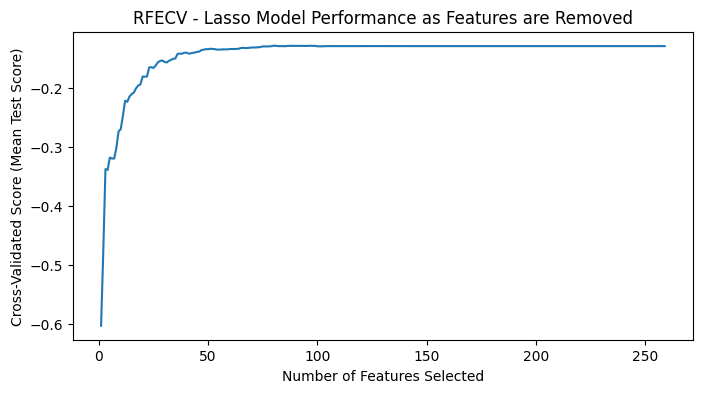

Optimal number of features: 81


In [71]:
# Initialise Lasso model and determine optimal features
lasso_est2 = Lasso(alpha=0.001)
rfecv_lasso_cols = perform_rfecv(lasso_est2, "Lasso")

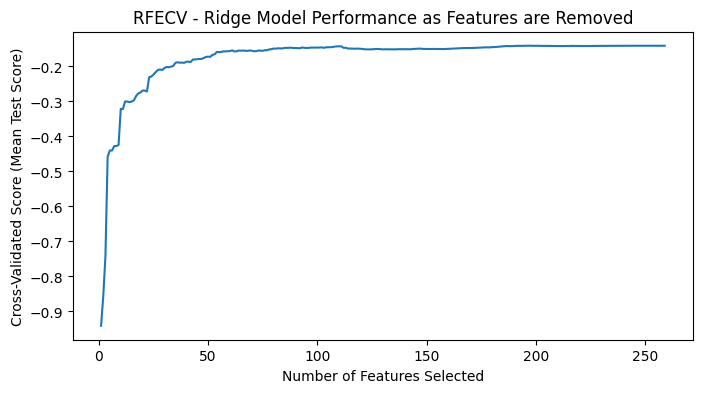

Optimal number of features: 196


In [74]:
# Initialise Ridge model and determine optimal features
ridge_est2 = Ridge(alpha=0.5)
rfecv_ridge_cols = perform_rfecv(ridge_est2, "Ridge")

In [75]:
print(len(rfecv_lasso_cols))
print(rfecv_lasso_cols)

81
['MSSubClass', 'Exterior1st_BrkFace', 'RoofMatl_WdShngl', 'RoofMatl_CompShg', 'HouseStyle_SLvl', 'HouseStyle_SFoyer', 'BldgType_Twnhs', 'Condition2_PosN', 'Condition1_RRAn', 'Condition1_RRAe', 'Condition1_Norm', 'Condition1_Feedr', 'Neighborhood_StoneBr', 'Neighborhood_Somerst', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_NWAmes', 'Neighborhood_Mitchel', 'Neighborhood_MeadowV', 'Neighborhood_IDOTRR', 'Neighborhood_Gilbert', 'Neighborhood_Edwards', 'Neighborhood_Crawfor', 'Exterior1st_MetalSd', 'Neighborhood_ClearCr', 'SaleCondition_Normal', 'Foundation_PConc', 'SaleCondition_Family', 'SaleType_WD', 'SaleType_New', 'PoolQC_Gd', 'GarageQual_Fa', 'GarageType_No Garage', 'FireplaceQu_No Fireplace', 'Functional_Typ', 'Functional_Maj2', 'KitchenQual_TA', 'KitchenQual_Gd', 'KitchenQual_Fa', 'CentralAir_Y', 'HeatingQC_TA', 'HeatingQC_Gd', 'HeatingQC_Fa', 'BsmtFinType1_LwQ', 'BsmtFinType1_GLQ', 'BsmtExposure_Gd', 'BsmtCond_TA', 'BsmtCond_Gd', 'BsmtQu

In [76]:
print(len(rfecv_ridge_cols))
print(rfecv_ridge_cols)

196
['MSSubClass', 'Exterior1st_Stone', 'SaleCondition_Normal', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'GarageQual_No Garage', 'GarageQual_Gd', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'GarageQual_Po', 'Exterior2nd_HdBoard', 'GarageFinish_No Garage', 'GarageType_No Garage', 'GarageType_Detchd', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'GarageType_CarPort', 'GarageQual_Fa', 'Exterior1st_MetalSd', 'GarageQual_TA', 'Exterior1st_HdBoard', 'HouseStyle_2.5Fin', 'Functional_Maj2', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'GarageCond_No Garage', 'GarageCond_Gd', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'GarageCond_Fa', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'GarageType_BuiltIn', 'GarageType_Ba

##### Model Development with the Reduced Features

Initialise Lasso and Ridge models, and review train, test and rmse figures

In [77]:
lasso_est2.fit(X_train[rfecv_lasso_cols], y_train)
train_score_lasso2, test_score_lasso2, rmse_lasso2 = evaluate_regression_model(lasso_est2, X_train[rfecv_lasso_cols], X_test[rfecv_lasso_cols], y_train, y_test)

train_score: 0.927, test_score: 0.901, rmse: 0.33


In [78]:
ridge_est2.fit(X_train[rfecv_ridge_cols], y_train)
train_score_ridge2, test_score_ridge2, rmse_ridge2 = evaluate_regression_model(ridge_est2, X_train[rfecv_ridge_cols], X_test[rfecv_ridge_cols], y_train, y_test)

train_score: 0.942, test_score: 0.9, rmse: 0.331


#### 4.2.2 Feature Selection for XGB Regressor

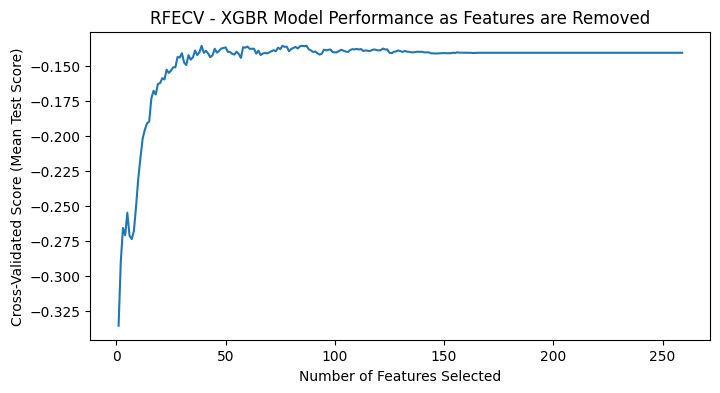

Optimal number of features: 87


In [79]:
# Determine optimal features for XGBR
rfecv_xgbr_cols = perform_rfecv(xgbr, "XGBR")

In [80]:
xgbr.fit(X_train[rfecv_xgbr_cols], y_train)
train_score_xgbr2, test_score_xgbr2, rmse_xgbr2 = evaluate_regression_model(xgbr, X_train[rfecv_xgbr_cols], X_test[rfecv_xgbr_cols], y_train, y_test)

train_score: 1.0, test_score: 0.852, rmse: 0.404


#### Save model features

In [81]:
# Save to file
save_list_to_file(rfecv_lasso_cols, project_path+"/data/feature_selection/", "Lasso_Features.txt")
save_list_to_file(rfecv_ridge_cols, project_path+"/data/feature_selection/", "Ridge_Features.txt")
save_list_to_file(rfecv_xgbr_cols, project_path+"/data/feature_selection/", "XGBR_Features.txt")

#### 4.2.3 Hyperparameter Tuning for XGB Regressor

In [83]:
# Define the parameter grid
params_ = {
    'eta': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [0.5, 1, 3, 5],
    'lambda':[0.00001, 0.0001, 0.001],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [100, 200, 300],
    }

In [84]:
# # Initialize the XGBRegressor
# xgbr2 = XGBRegressor()

In [85]:
# # Define the RMSE scoring function
# def rmse(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# rmse_scorer_ = make_scorer(rmse, greater_is_better=False)

# # Initialize GridSearchCV
# grid_search_xgbr = GridSearchCV(estimator=xgbr2, param_grid=params_, 
#                            scoring=rmse_scorer_, n_jobs=-1, cv=5, verbose=2)

# # Fit GridSearchCV
# grid_search_xgbr.fit(X_train, y_train)

# grid_search_xgbr.best_estimator_

# # Best estimator
# gs_est_xgbr = grid_search_xgbr.best_estimator_

In [86]:
# gs_est_xgbr.fit(X_train[rfecv_xgbr_cols], y_train)
# train_score_xgbr3, test_score_xgbr3, rmse_xgbr3 = evaluate_regression_model(gs_est_xgbr, X_train[rfecv_xgbr_cols], X_test[rfecv_xgbr_cols], y_train, y_test)

##### The previous code block utilising GridSearch was previously executed and the best params are recorded below nullifying the requirement to run the GridSearch method due to the time taken for execution.

In [87]:
# # params manually saved so grid search does not require running again, unless additional values are being explored
params_ = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 5,
    'lambda': 0.0001,
    'subsample': 0.7,
    'colsample_bytree': 0.8,
    'n_estimators': 300,
    }

# Initialize the XGBRegressor
xgbr3 = XGBRegressor(**params_)

# Fit the model
xgbr3.fit(X_train[rfecv_xgbr_cols], y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None, lambda=0.0001,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, ...)

In [88]:
train_score_xgbr4, test_score_xgbr4, rmse_xgbr4 = evaluate_regression_model(xgbr3, X_train[rfecv_xgbr_cols], X_test[rfecv_xgbr_cols], y_train, y_test)

train_score: 0.984, test_score: 0.879, rmse: 0.365


#### Conclusions:
- The xgb regressor appears to be suffering from overfitting (train_score: 0.984, test_score: 0.879), further work can be undertaken to minimise this phenonenom - however this will not be performed
- Ridge and Lasso are comparable in performance and both have higher test and train scores whilst having a lower rsme. This indicates these two estimators should perform better on the unseen data compared to the tree-based model
- Performance on unseen data is captured in another notebook (refer to "Run_Models_on_Unseen_Data")

### Save Models

In [89]:
# Get today's date
today = datetime.today().date()

# Format date
formatted_date = today.strftime('%Y_%m_%d')

Lassomodelfilename = project_path+"/data/models/"+formatted_date+"_Lasso"
Ridgemodelfilename = project_path+"/data/models/"+formatted_date+"_Ridge"
XGBRmodelfilename = project_path+"/data/models/"+formatted_date+"_XGBR"

# Save models to files
pickle.dump(lasso_est2,open(Lassomodelfilename , "wb"))
pickle.dump(ridge_est2,open(Ridgemodelfilename , "wb"))
pickle.dump(xgbr3,open(XGBRmodelfilename , "wb"))